<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./6_2_1_MLR_bus_weather.ipynb">← Previous: Appendix B.1: MLR With Weather</a>
<span style="flex: 1; text-align: right;"></span>
</div>

### Appendix B.2: MLR With Traffic
---


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler #sci-kit learn

In [2]:
df_test2 = pd.read_csv('../Data/master_data_traffic.csv')

In [3]:
df_test2 = df_test2.drop(columns=['date','end_time'])

# Extract only the time part from the datetime string
df_test2['start_time'] = df_test2['start_time'].str.split(' ').str[1]

# Convert the start_time column to minutes after midnight
df_test2['start_time'] = pd.to_datetime(df_test2['start_time'], format='%H:%M:%S')
df_test2['start_time'] = df_test2['start_time'].dt.hour * 60 + df_test2['start_time'].dt.minute

df_test2.head().to_markdown()


'|    |   line |   delay_start |   start_time |   temp_start |   rain_amt |   snow_amt |   delay_end |   total_traffic |   T_NBLT |   T_NBT |   T_NBRT |   T_SBLT |   T_SBT |   T_SBRT |   T_EBLT |   T_EBT |   T_EBRT |   T_WBLT |   T_WBT |   T_WBRT |\n|---:|-------:|--------------:|-------------:|-------------:|-----------:|-----------:|------------:|----------------:|---------:|--------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|\n|  0 |    467 |             0 |          405 |          7.1 |          0 |          0 |           6 |            3674 |        0 |    1236 |       23 |        4 |    1270 |      155 |      165 |     157 |       68 |        2 |     478 |      116 |\n|  1 |    467 |             1 |          437 |          6.9 |          0 |          0 |           5 |            3116 |        0 |    1031 |       56 |        0 |     927 |      103 |      130 |     238 |       45 |        0 |     473 |      113 |\n|  

In [4]:
df_test2.head()

,line,delay_start,start_time,temp_start,rain_amt,snow_amt,delay_end,total_traffic,T_NBLT,T_NBT,T_NBRT,T_SBLT,T_SBT,T_SBRT,T_EBLT,T_EBT,T_EBRT,T_WBLT,T_WBT,T_WBRT
0,467,0,405,7.1,0.0,0.0,6,3674.0,0.0,1236.0,23.0,4.0,1270.0,155.0,165.0,157.0,68.0,2.0,478.0,116.0
1,467,1,437,6.9,0.0,0.0,5,3116.0,0.0,1031.0,56.0,0.0,927.0,103.0,130.0,238.0,45.0,0.0,473.0,113.0
2,467,1,468,6.9,0.0,0.0,6,3984.0,0.0,1330.0,44.0,0.0,1167.0,170.0,191.0,312.0,89.0,3.0,567.0,111.0
3,467,-1,496,6.5,0.0,0.0,6,2655.0,0.0,853.0,35.0,0.0,884.0,113.0,116.0,171.0,86.0,1.0,321.0,75.0
4,467,0,527,6.5,0.0,0.0,6,2273.0,0.0,762.0,32.0,0.0,774.0,81.0,96.0,164.0,47.0,1.0,253.0,63.0


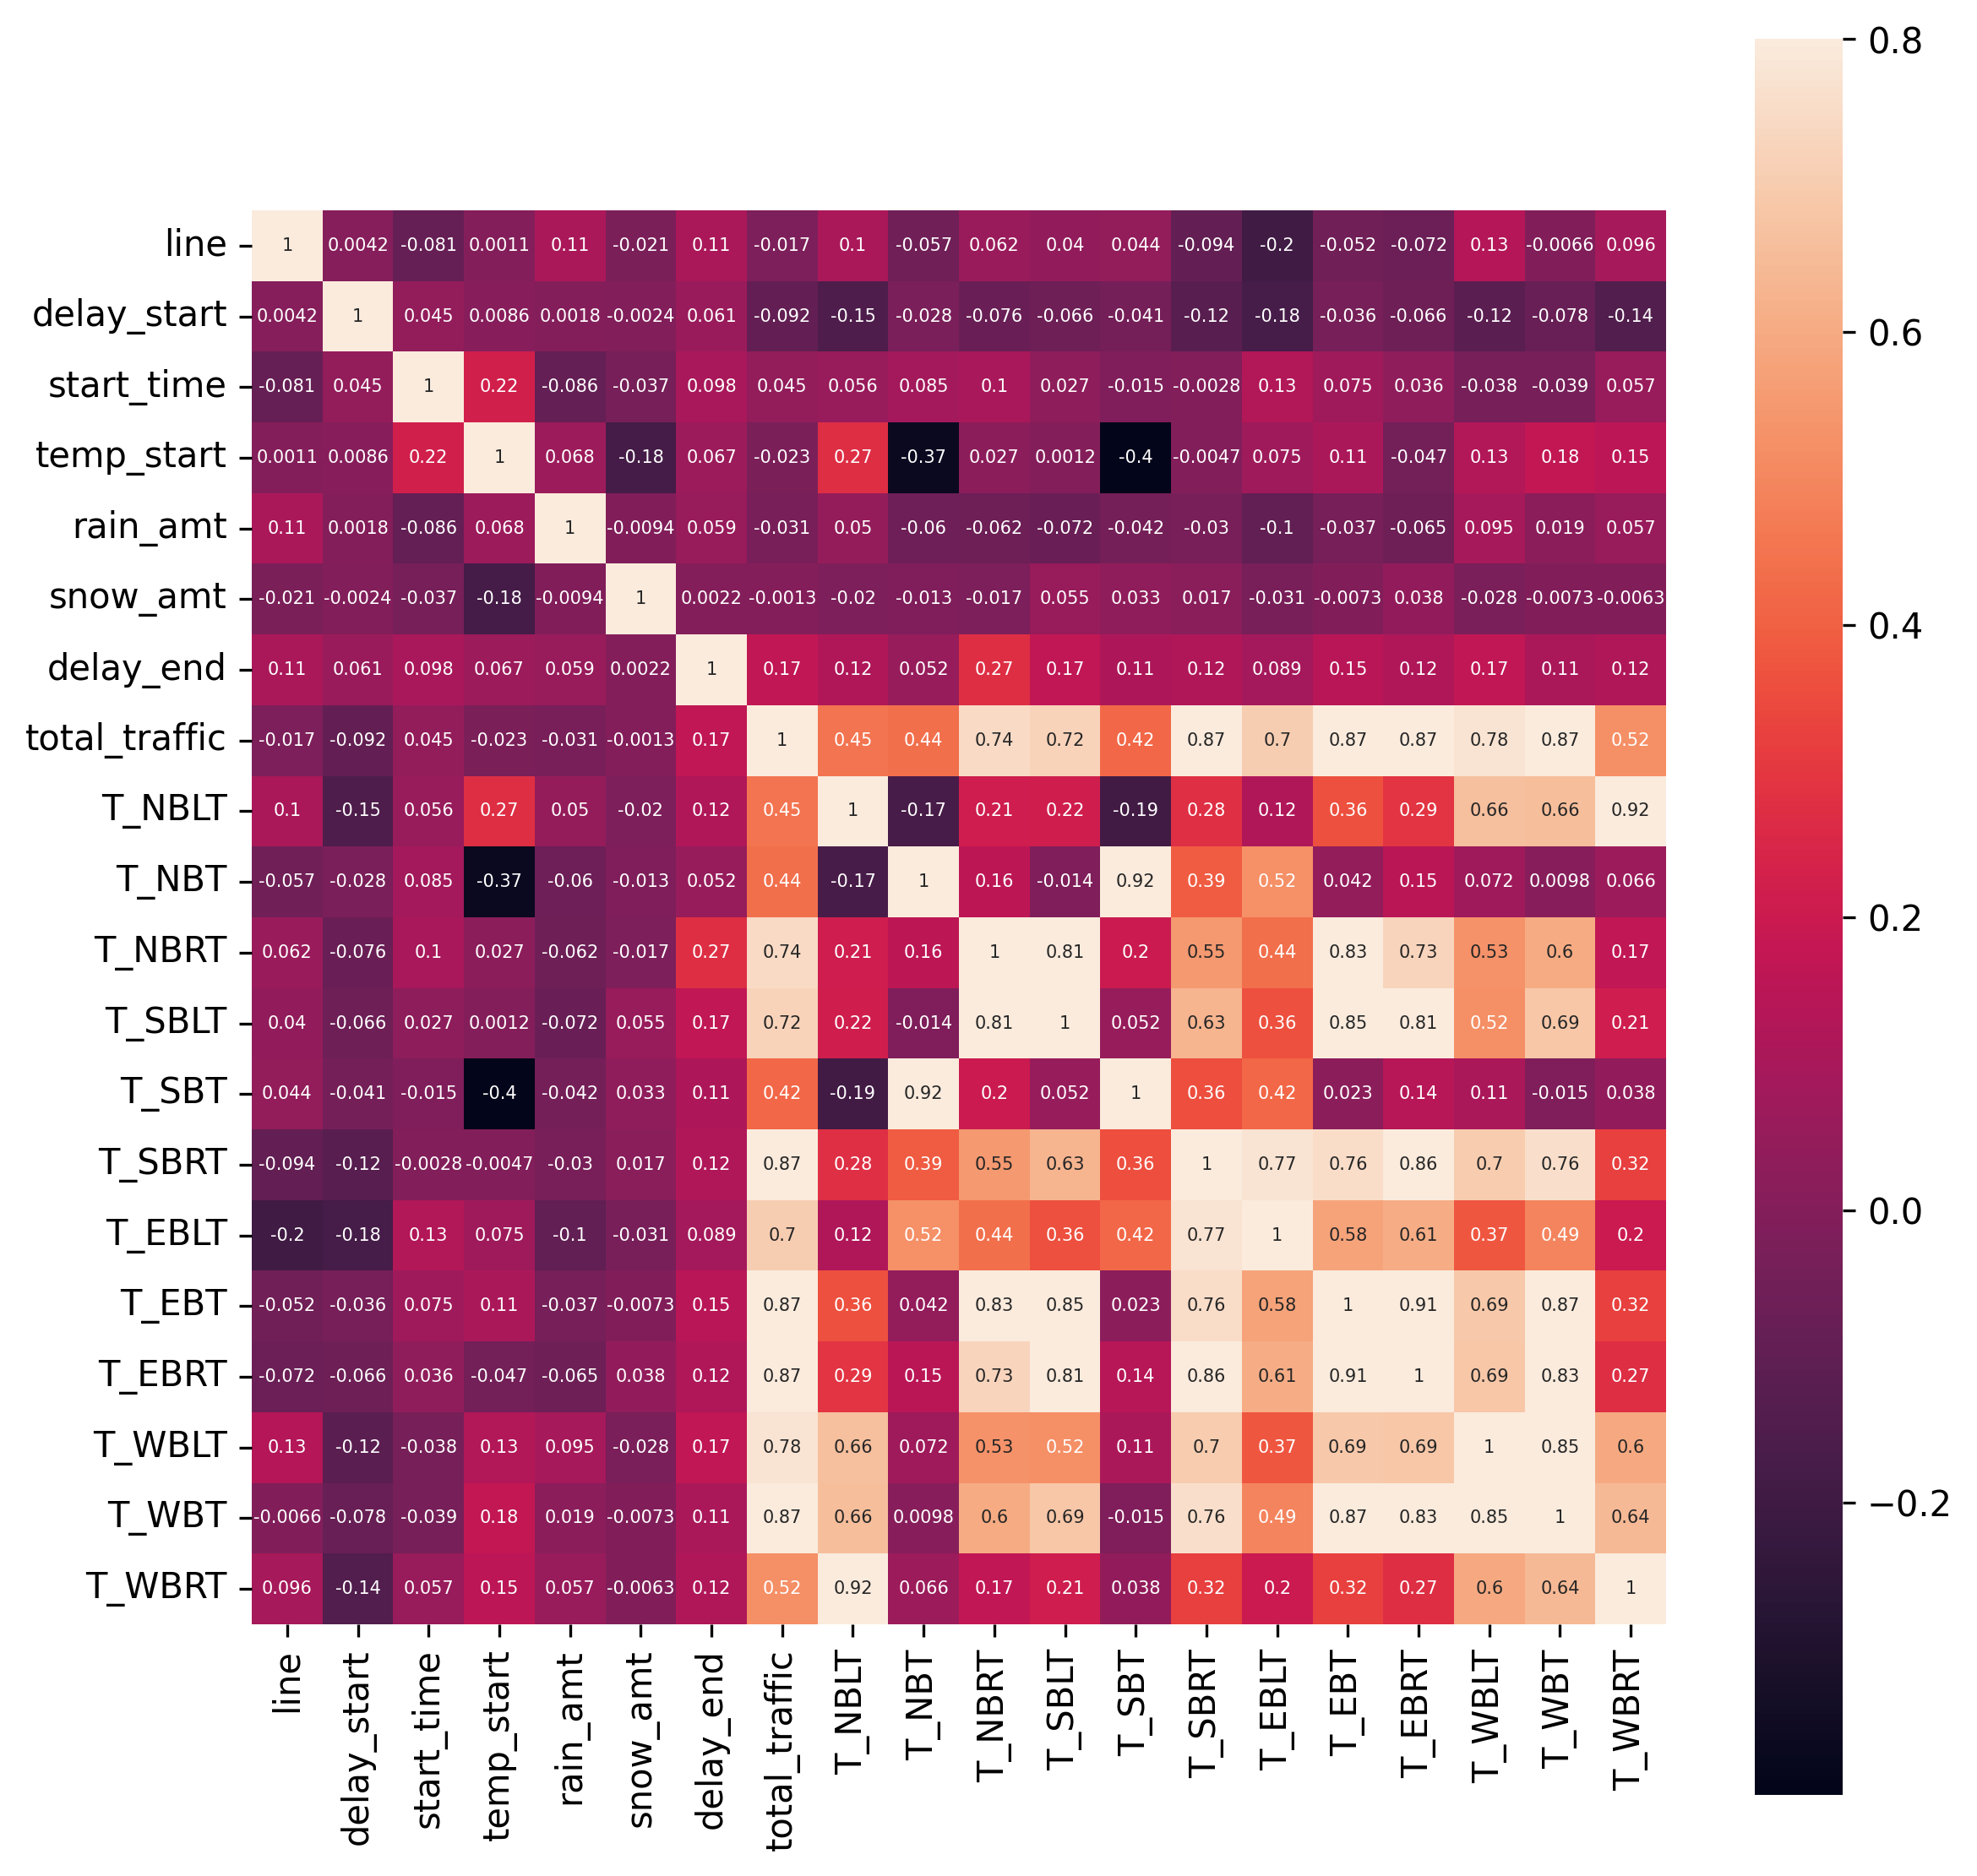

In [5]:
Corr_mat = df_test2.corr()

# Increase the resolution of the image
fig = plt.figure(figsize=(9, 9), dpi=300)

sb.heatmap(Corr_mat, vmax=.8, square=True, annot=True, annot_kws={"size": 5})
plt.savefig('../Images/3_2_1_corr_mat_3.png', dpi=300)
plt.show()

In [6]:
#set predictors_t as all columns of df_test2 except delay_end
predictors_t = df_test2.columns.tolist()
predictors_t.remove('delay_end')
outcome_t = 'delay_end'

In [7]:
#convert all columns to float
for col in predictors_t:
    df_test2[col] = df_test2[col].astype(float)

for i in range(len(predictors_t)):
    for j in range(len(predictors_t)):
        if i < j:
            corr, _ = pearsonr(df_test2[predictors_t[i]], df_test2[predictors_t[j]])
            print('The correlation between', predictors_t[i], 'and', predictors_t[j], 'is', str(corr))

The correlation between line and delay_start is 0.00423262576488436
The correlation between line and start_time is -0.08131474278255989
The correlation between line and temp_start is 0.0011059130260820571
The correlation between line and rain_amt is 0.10817207314619824
The correlation between line and snow_amt is -0.020996157296869038
The correlation between line and total_traffic is -0.016745877604250385
The correlation between line and T_NBLT is 0.10464780116958132
The correlation between line and T_NBT is -0.057145893540467035
The correlation between line and T_NBRT is 0.06161622369865741
The correlation between line and T_SBLT is 0.04048895325450051
The correlation between line and T_SBT is 0.04429601561023412
The correlation between line and T_SBRT is -0.09393275088786161
The correlation between line and T_EBLT is -0.19628837791013445
The correlation between line and T_EBT is -0.05214984500973916
The correlation between line and T_EBRT is -0.07167294918584301
The correlation betwe

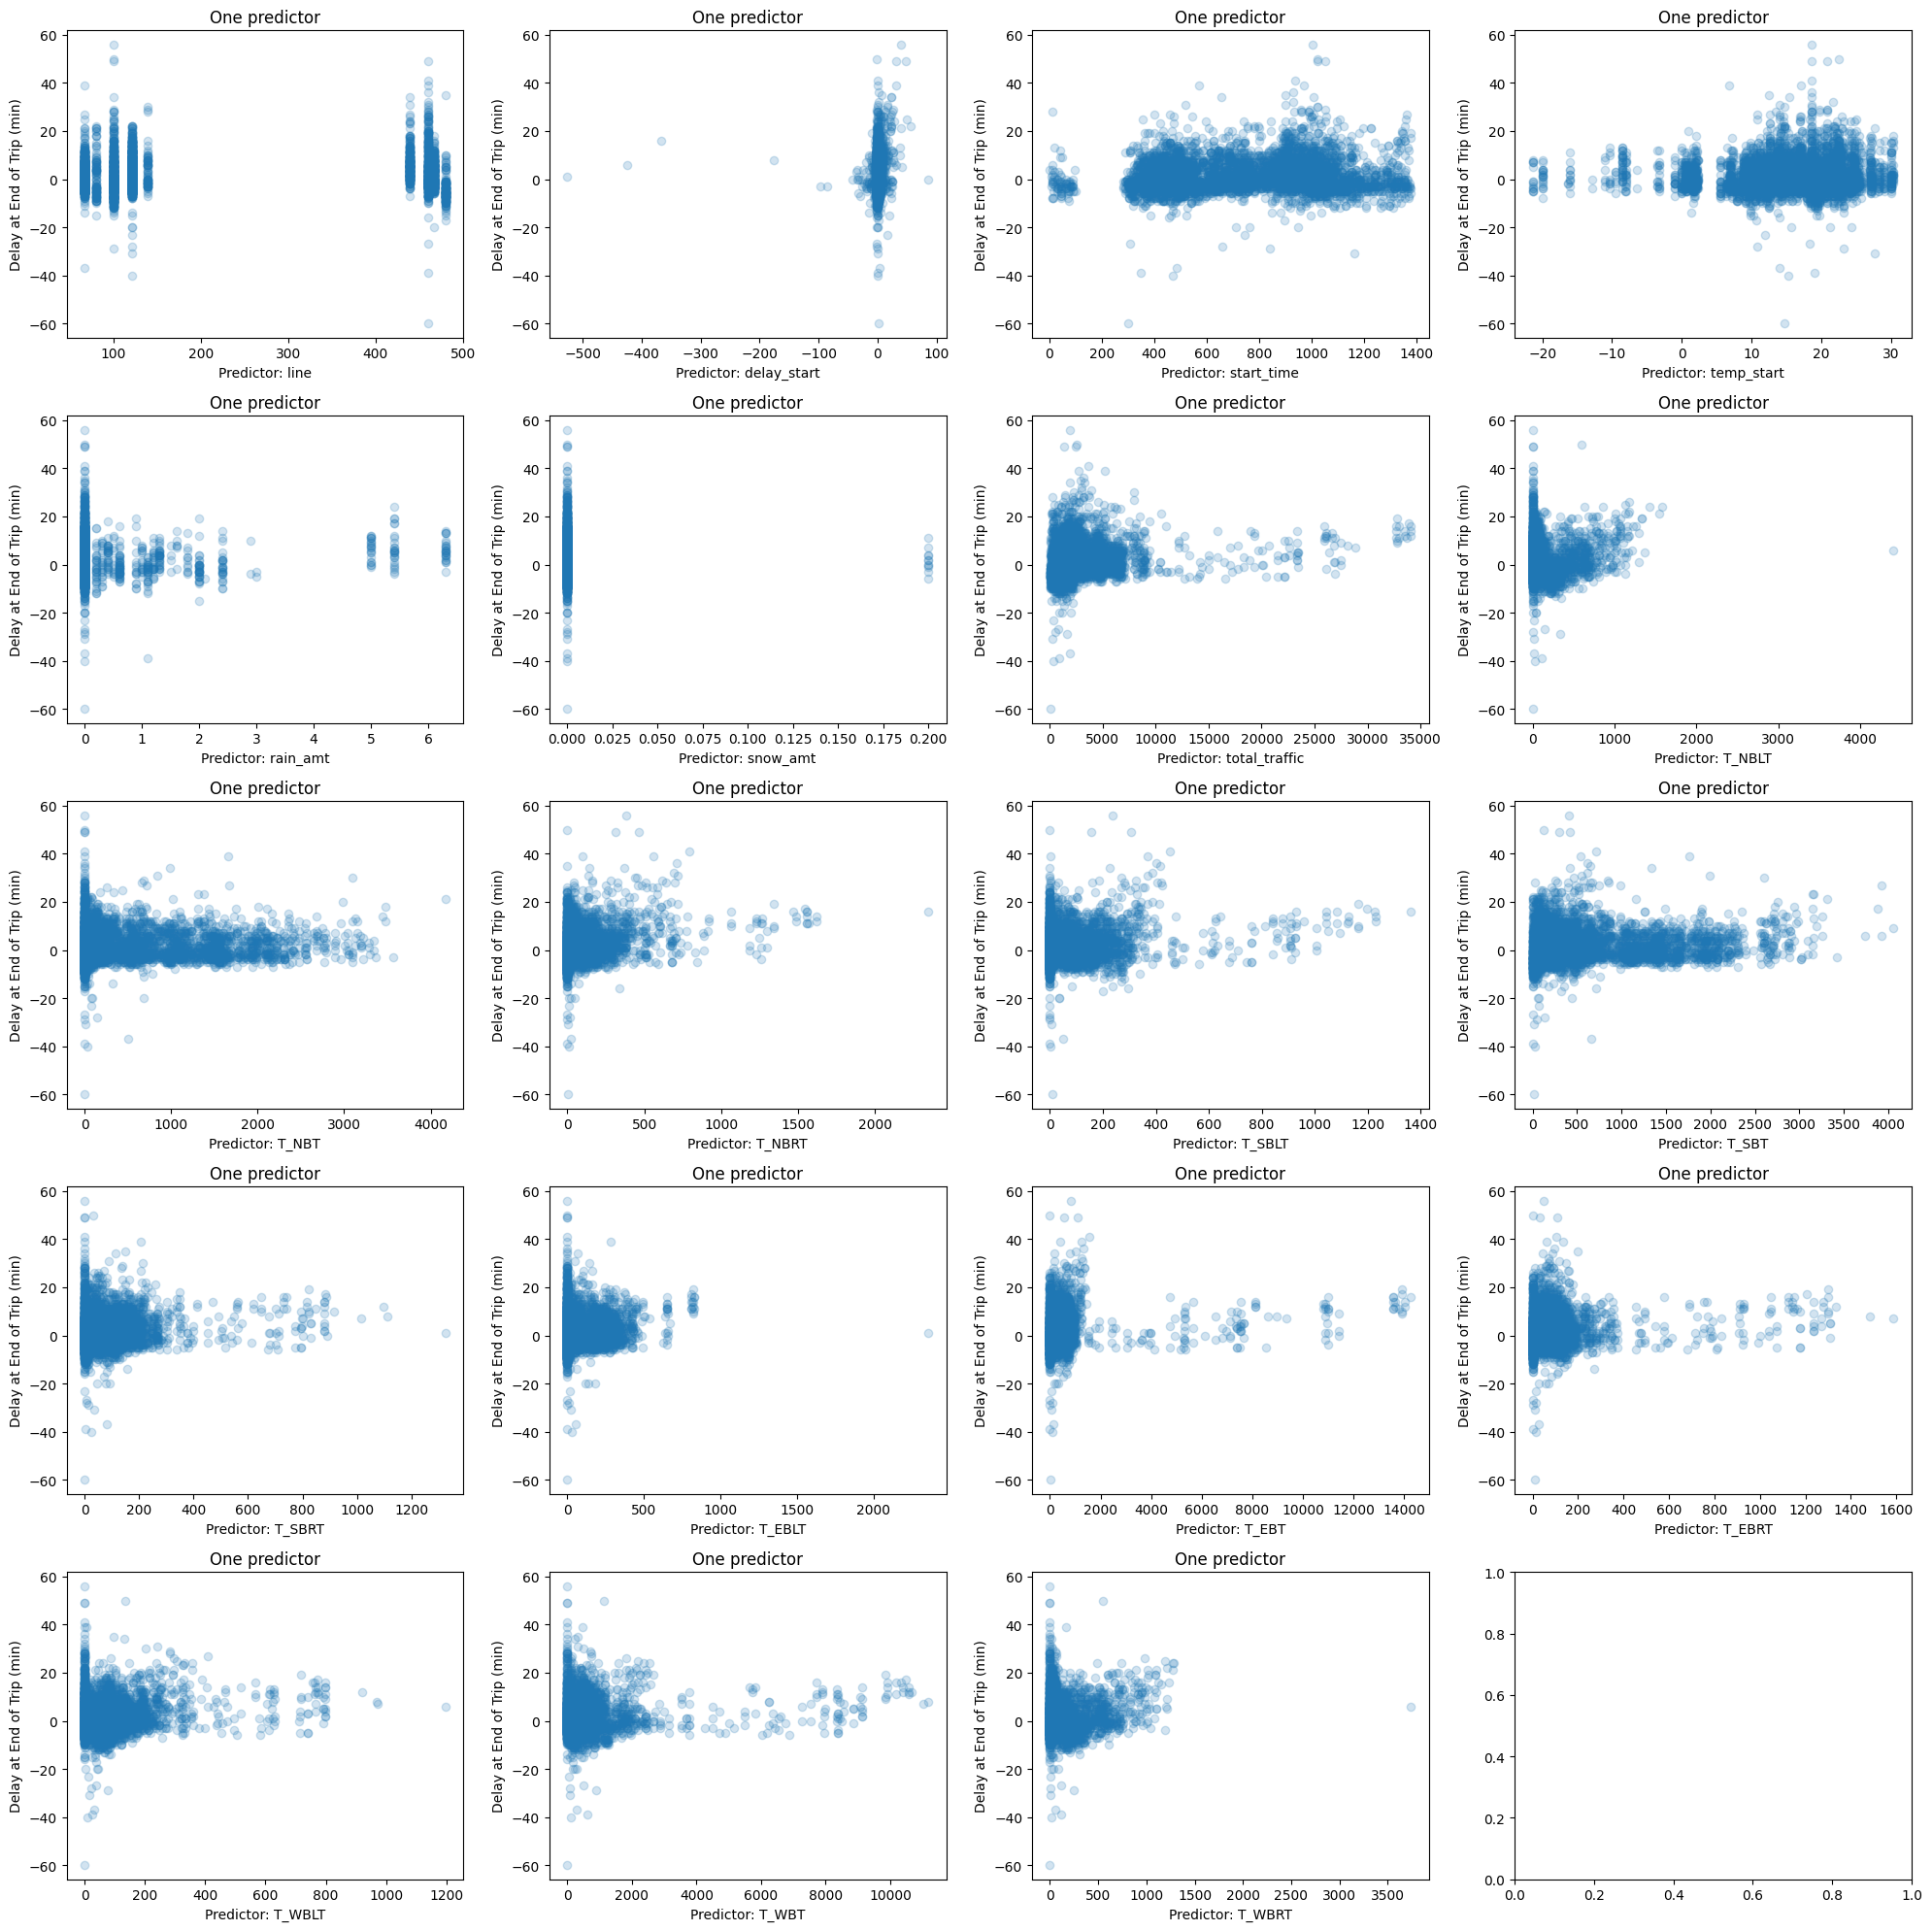

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

if len(predictors_t) <= len(ax.flat):
    for i, axi in enumerate(ax.flat):
        if i < len(predictors_t):
            axi.scatter(df_test2[predictors_t[i]], df_test2[outcome_t], color='tab:blue', alpha=0.2)
            axi.set_ylabel('Delay at End of Trip (min)')
            axi.set_xlabel(f'Predictor: {predictors_t[i]}')
            axi.set_title("One predictor")
else:
    print("Number of predictors exceeds the number of subplots")

plt.tight_layout()
plt.savefig('../Images/3_2_2_scatter_plots_3.png', dpi=300)
plt.show()

In [9]:
#lets make a model with all lines

predictors_t2 = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt', 'total_traffic', 'line']
outcome_t2 = 'delay_end'

#remove the columns that are not in predictors_t2 or outcome_t2 or 'line'
df_test2 = df_test2[predictors_t2 + [outcome_t2]]



model = sm.OLS(df_test2[outcome_t2], df_test2[predictors_t2].assign(const=1))
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              delay_end   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     48.27
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           8.58e-67
Time:                        14:27:29   Log-Likelihood:                -16977.
No. Observations:                5134   AIC:                         3.397e+04
Df Residuals:                    5126   BIC:                         3.402e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
delay_start       0.0412      0.008      5.293      0.000       0.026       0.057
start_time        0.0021      0.000      6.436      0.000       0.001       0.003
temp_start        0.0427      0.012      3.520      0.000       0.019       0.066
rain_amt          0.5369      0.129      4.155      0.000       0.284       0.790
snow_amt         13.1229     10.146      1.293      0.196      -6.768      33.014
total_traffic     0.0004   2.73e-05     13.031      0.000       0.000       0.000
line              0.0047      0.001      8.079      0.000       0.004       0.006
const            -2.6331      0.319     -8.258      0.000      -3.258      -2.008
==============================================================================
Omnibus:                     1162.705   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8848.813
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       9.189   Cond. No.                     4.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
summary = results.summary()

markdown_text = ""

for i, table in enumerate(summary.tables):
    # Convert the table to a DataFrame
    df_table = pd.DataFrame(table.data)
    
    # Set the DataFrame's column headers to the first row of data
    df_table.columns = df_table.iloc[0]
    df_table = df_table[1:]
    
    # Convert the DataFrame to a markdown table
    markdown_table = df_table.to_markdown()
    
    # Append the markdown table to the markdown text
    markdown_text += f"**Table {i+1}**\n\n"
    markdown_text += markdown_table
    markdown_text += "\n\n"

# Print the markdown text
print(markdown_text)

**Table 1**

|    | Dep. Variable:    | delay_end        |   R-squared:            |    0.062   |
|---:|:------------------|:-----------------|:------------------------|:-----------|
|  1 | Model:            | OLS              | Adj. R-squared:         | 0.061      |
|  2 | Method:           | Least Squares    | F-statistic:            | 48.27      |
|  3 | Date:             | Thu, 04 Jan 2024 | Prob (F-statistic):     | 8.58e-67   |
|  4 | Time:             | 14:27:29         | Log-Likelihood:         | -16977.    |
|  5 | No. Observations: | 5134             | AIC:                    | 3.397e+04  |
|  6 | Df Residuals:     | 5126             | BIC:                    | 3.402e+04  |
|  7 | Df Model:         | 7                |                         |            |
|  8 | Covariance Type:  | nonrobust        |                         |            |

**Table 2**

|    |               |    coef |   std err |      t |   P>|t| |   [0.025 |   0.975] |
|---:|:--------------|--------:|-----

In [11]:
#make a dictionary of dataframes for each line
df_line_t = {value: df_test2.loc[df_test2['line'] == value] for value in df_test2['line'].unique()}
#each dataframe can be accessed by df_line_t[line], e.g. df_line_t[1] is the dataframe for line 1



In [12]:
#print keys of df_line_t
for key in df_line_t.keys():
    print(key)

467.0
67.0
480.0
121.0
80.0
100.0
460.0
139.0
439.0


In [13]:
# Find the number of datapoints in each line
keys = list(df_line_t.keys())
data = []
for key in keys:
    data.append([key, len(df_line_t[key])])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Line', 'Number of Datapoints'])

# Print the DataFrame as a Markdown table
print(df.to_markdown(index=False))

# Remove lines with less than 300 datapoints
keys = list(df_line_t.keys())
for key in keys:
    if len(df_line_t[key]) < 300:
        df_line_t.pop(key, None)


|   Line |   Number of Datapoints |
|-------:|-----------------------:|
|    467 |                    395 |
|     67 |                   1218 |
|    480 |                    171 |
|    121 |                   1592 |
|     80 |                    103 |
|    100 |                    789 |
|    460 |                    481 |
|    139 |                     77 |
|    439 |                    308 |


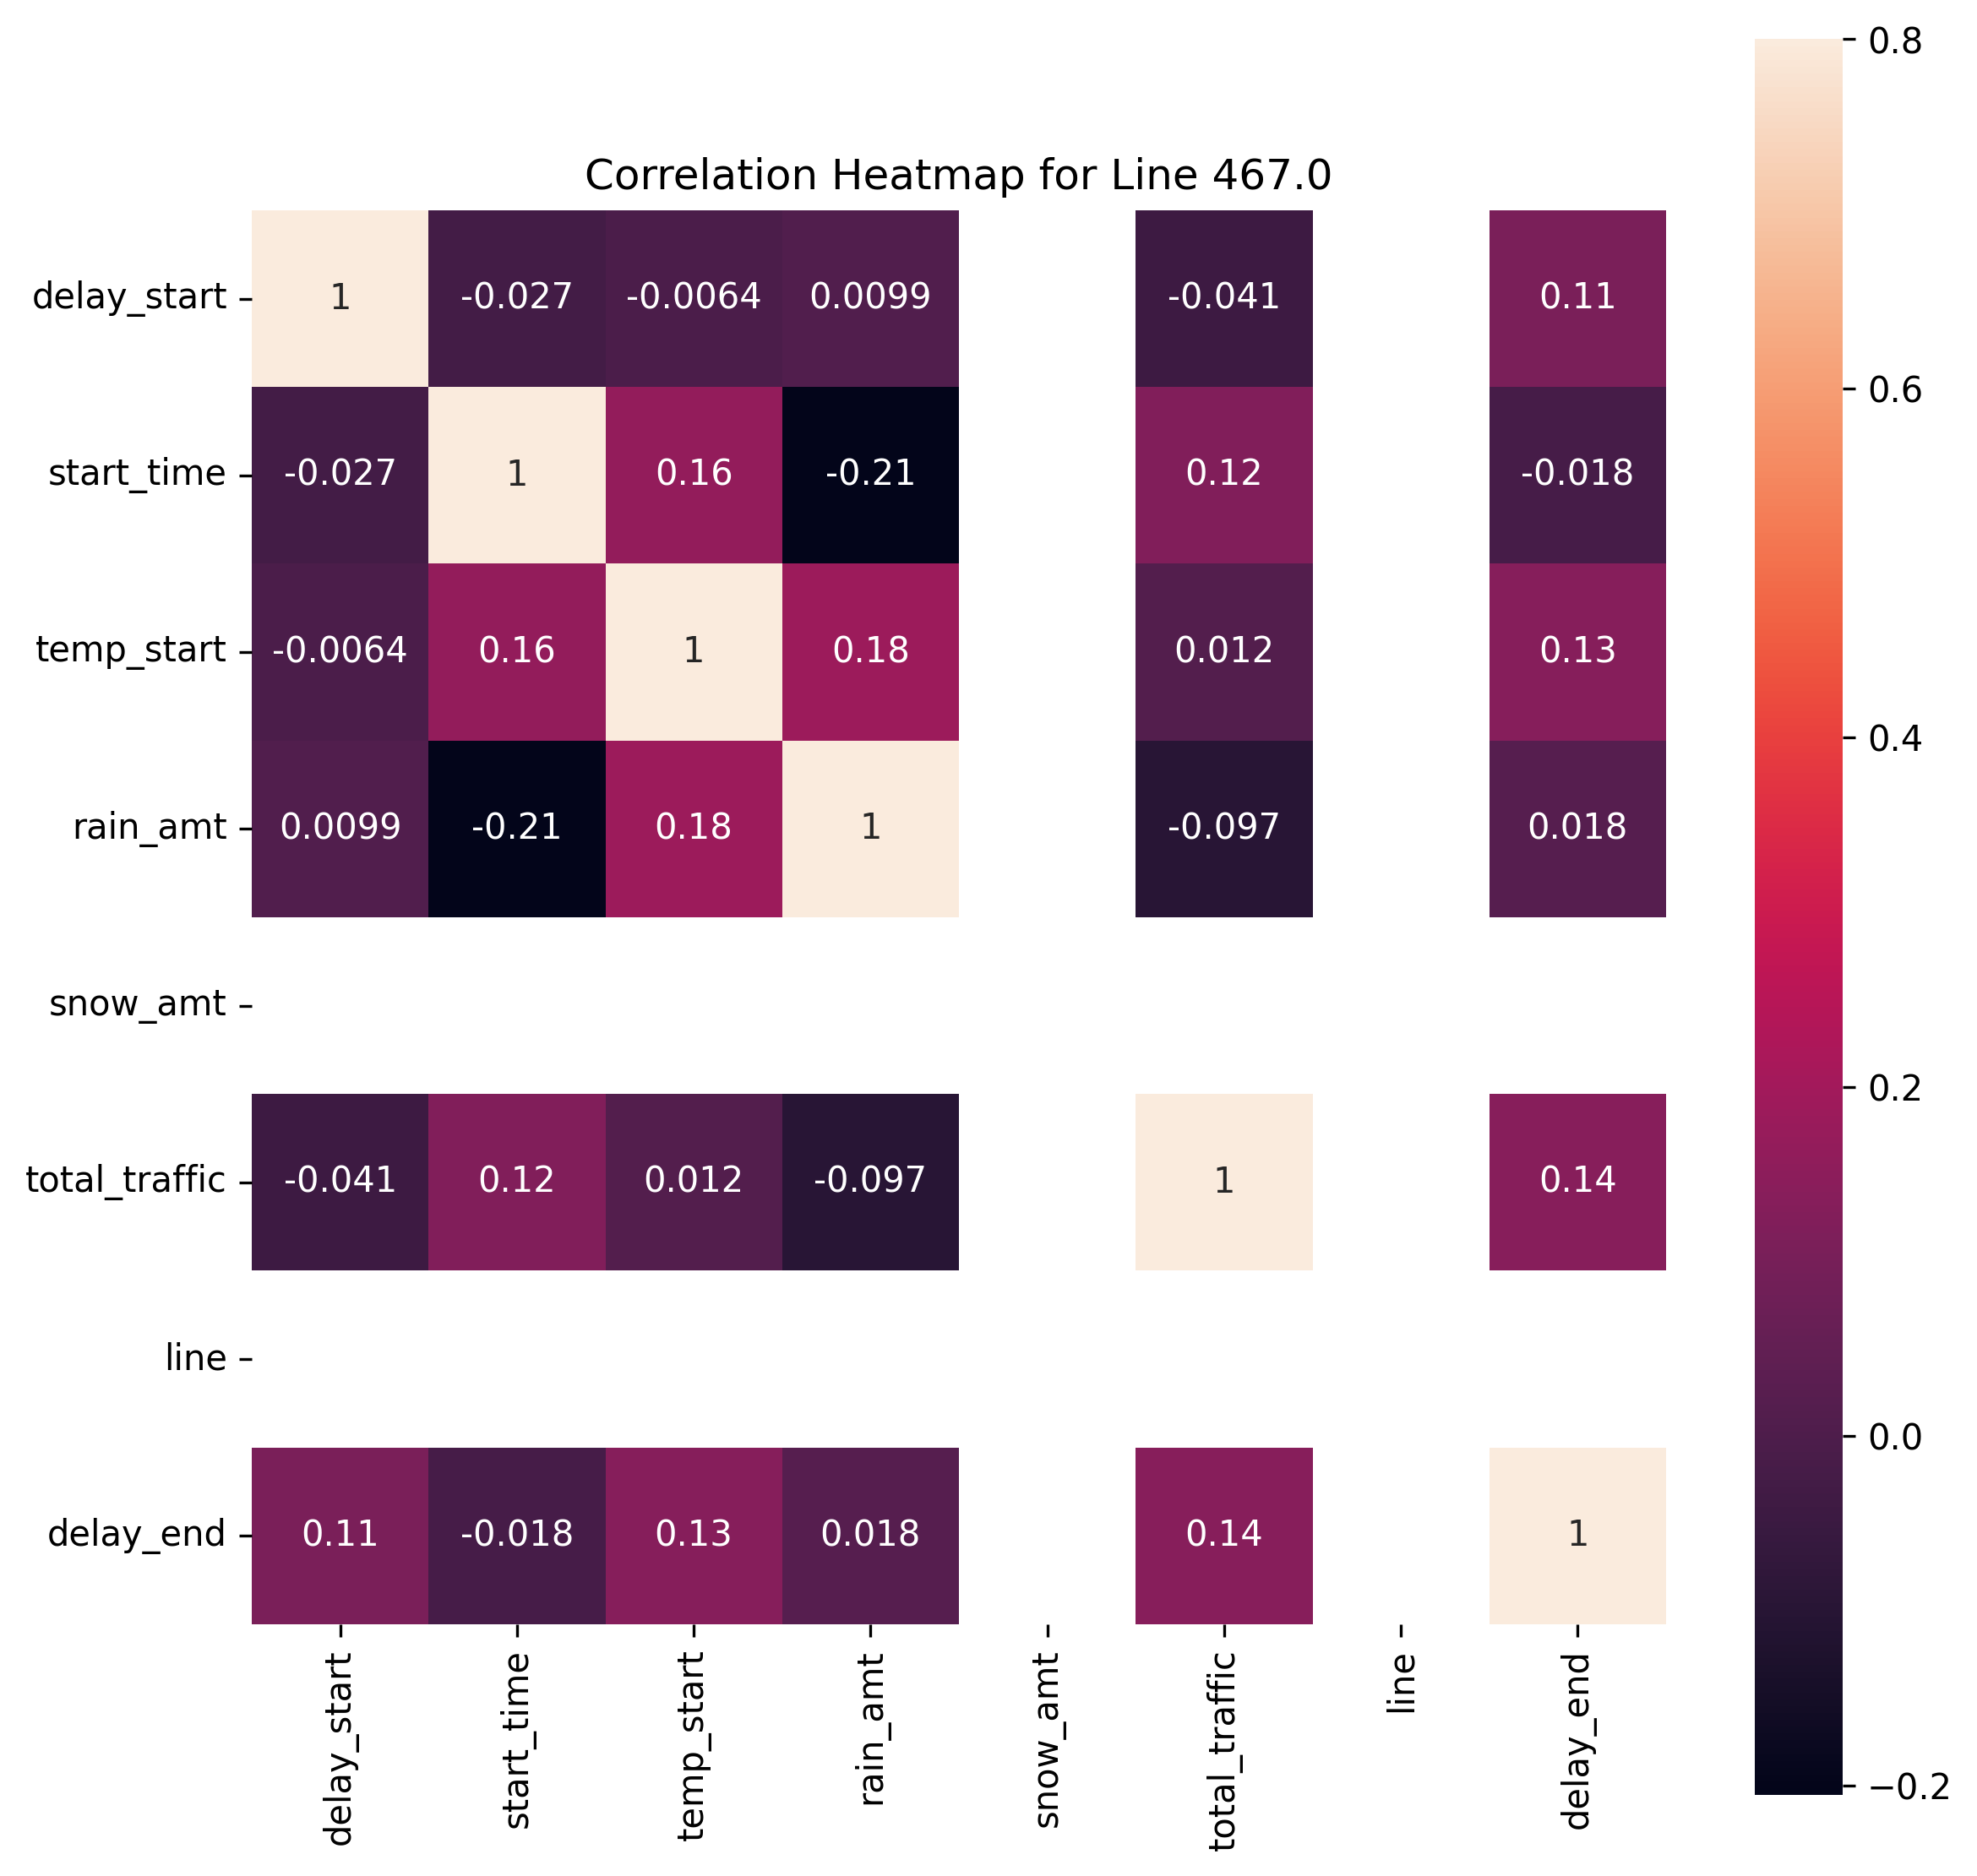

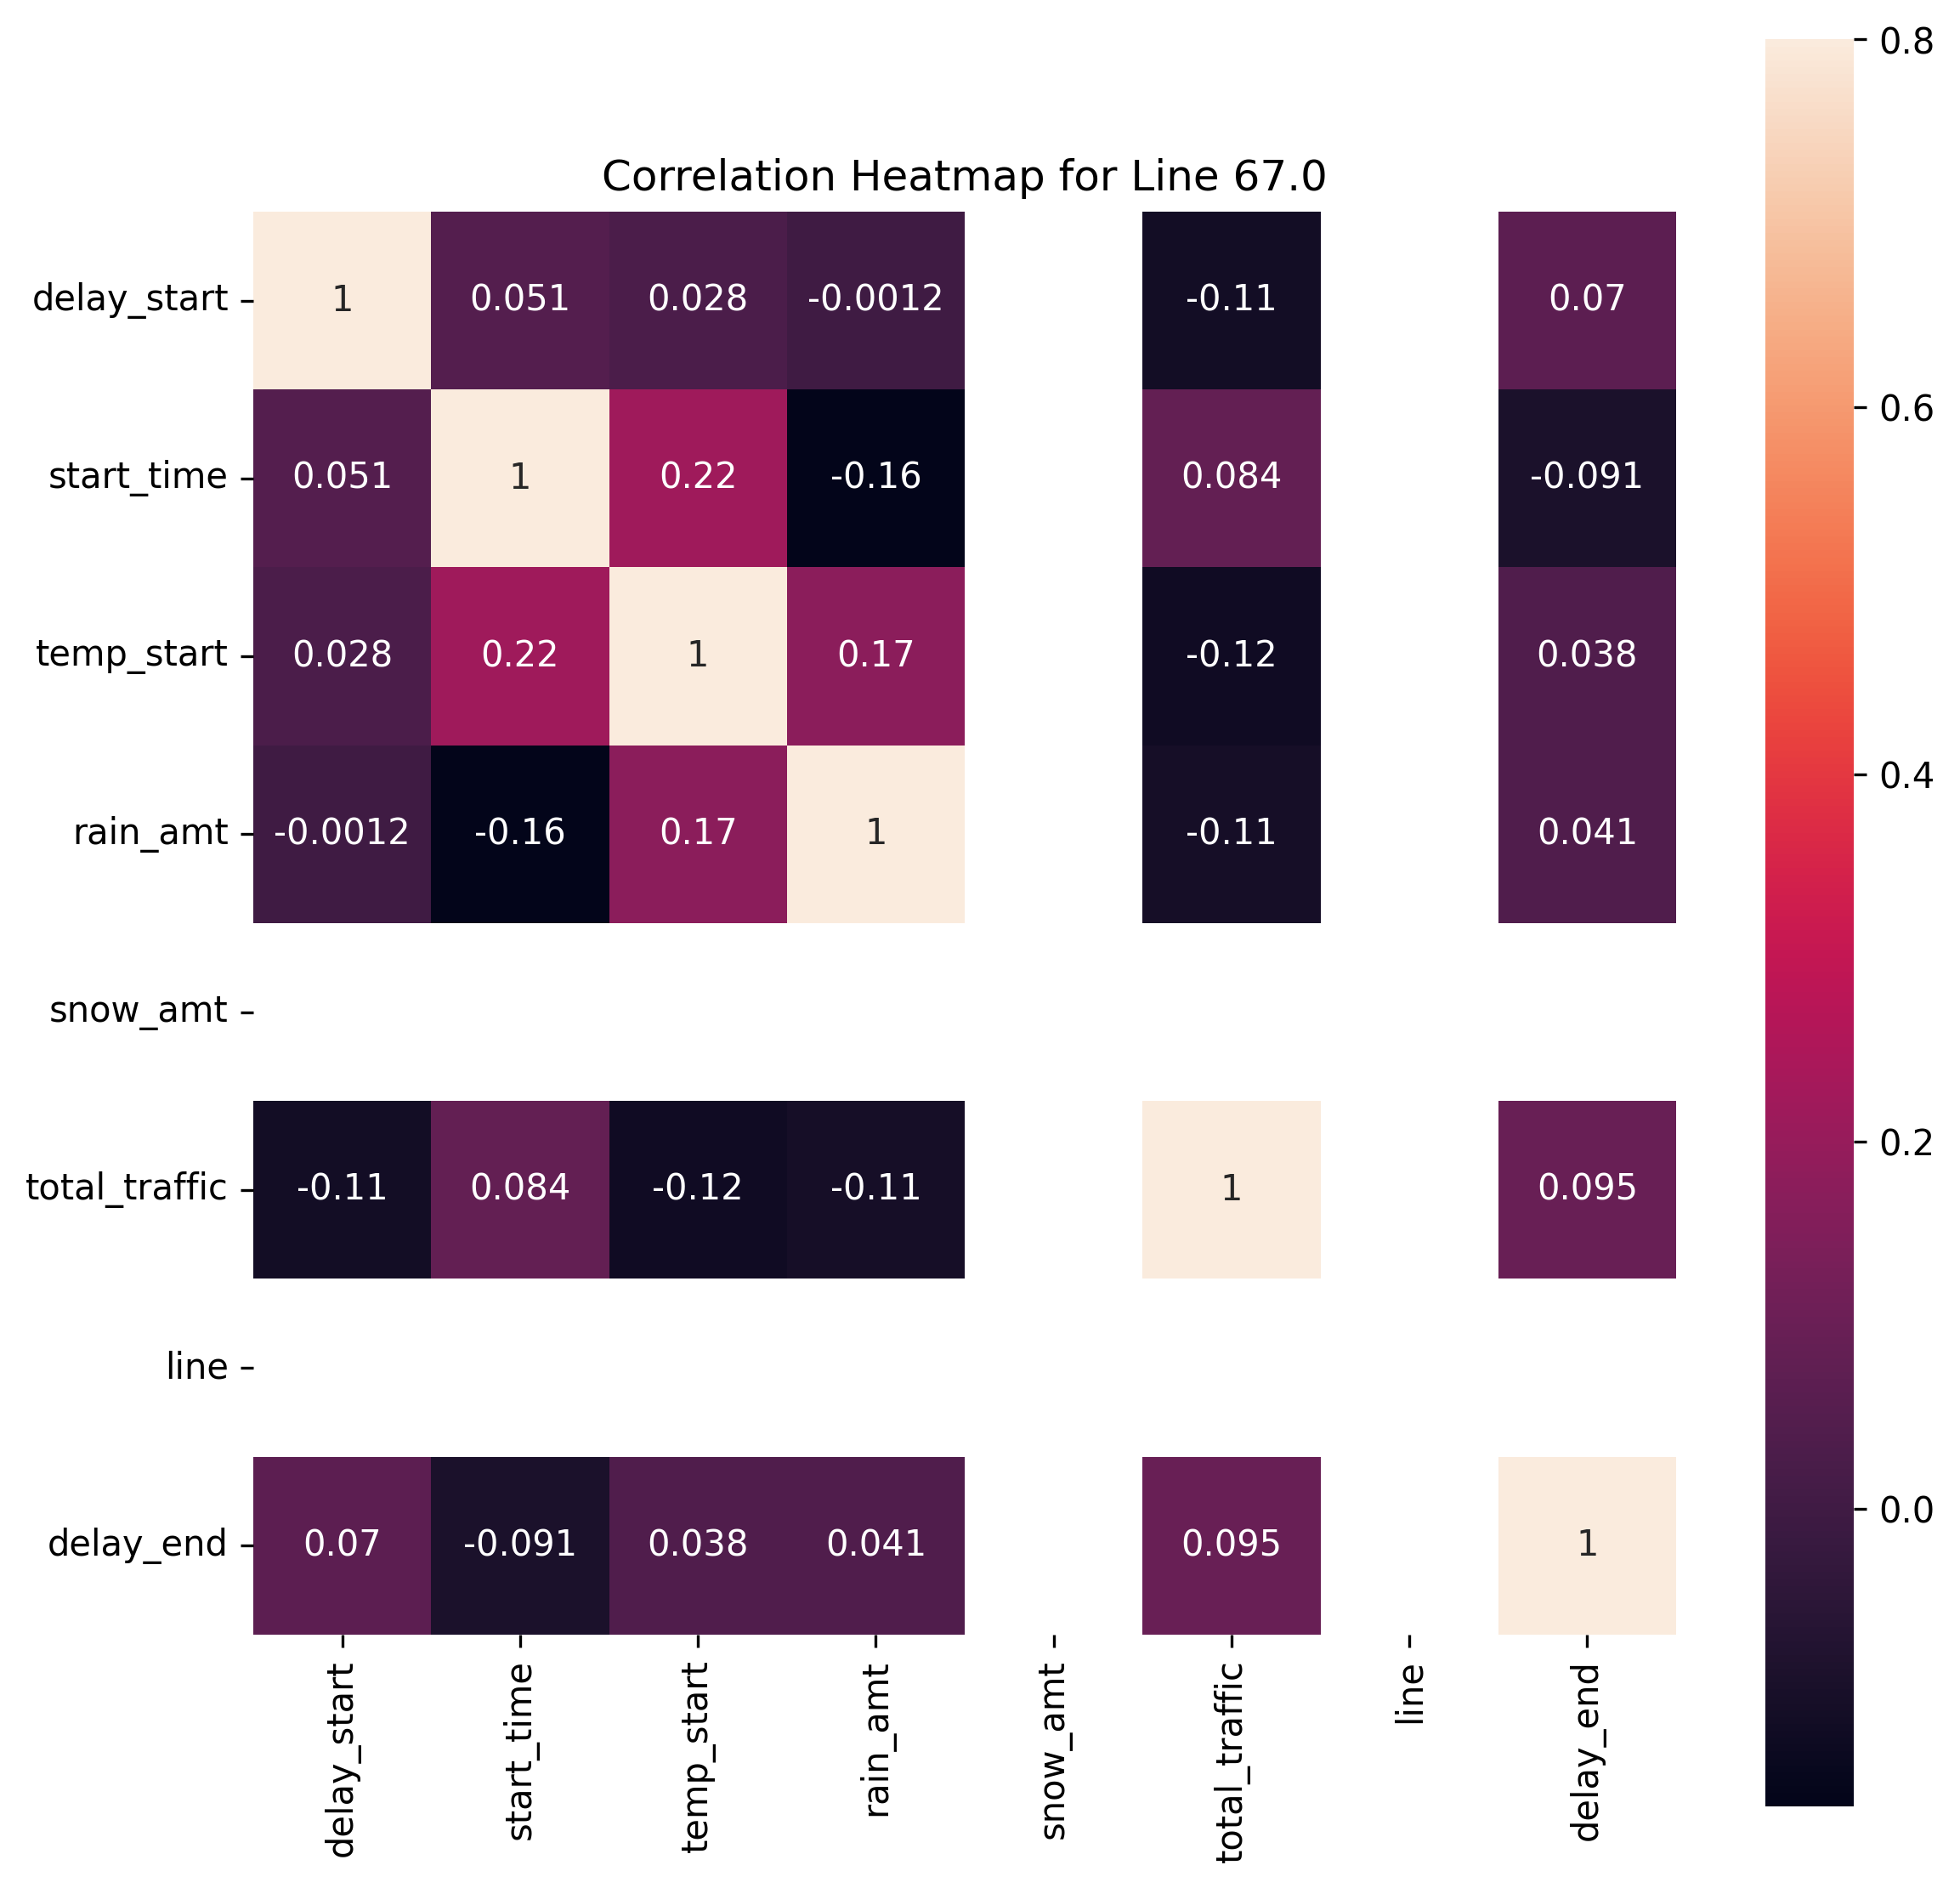

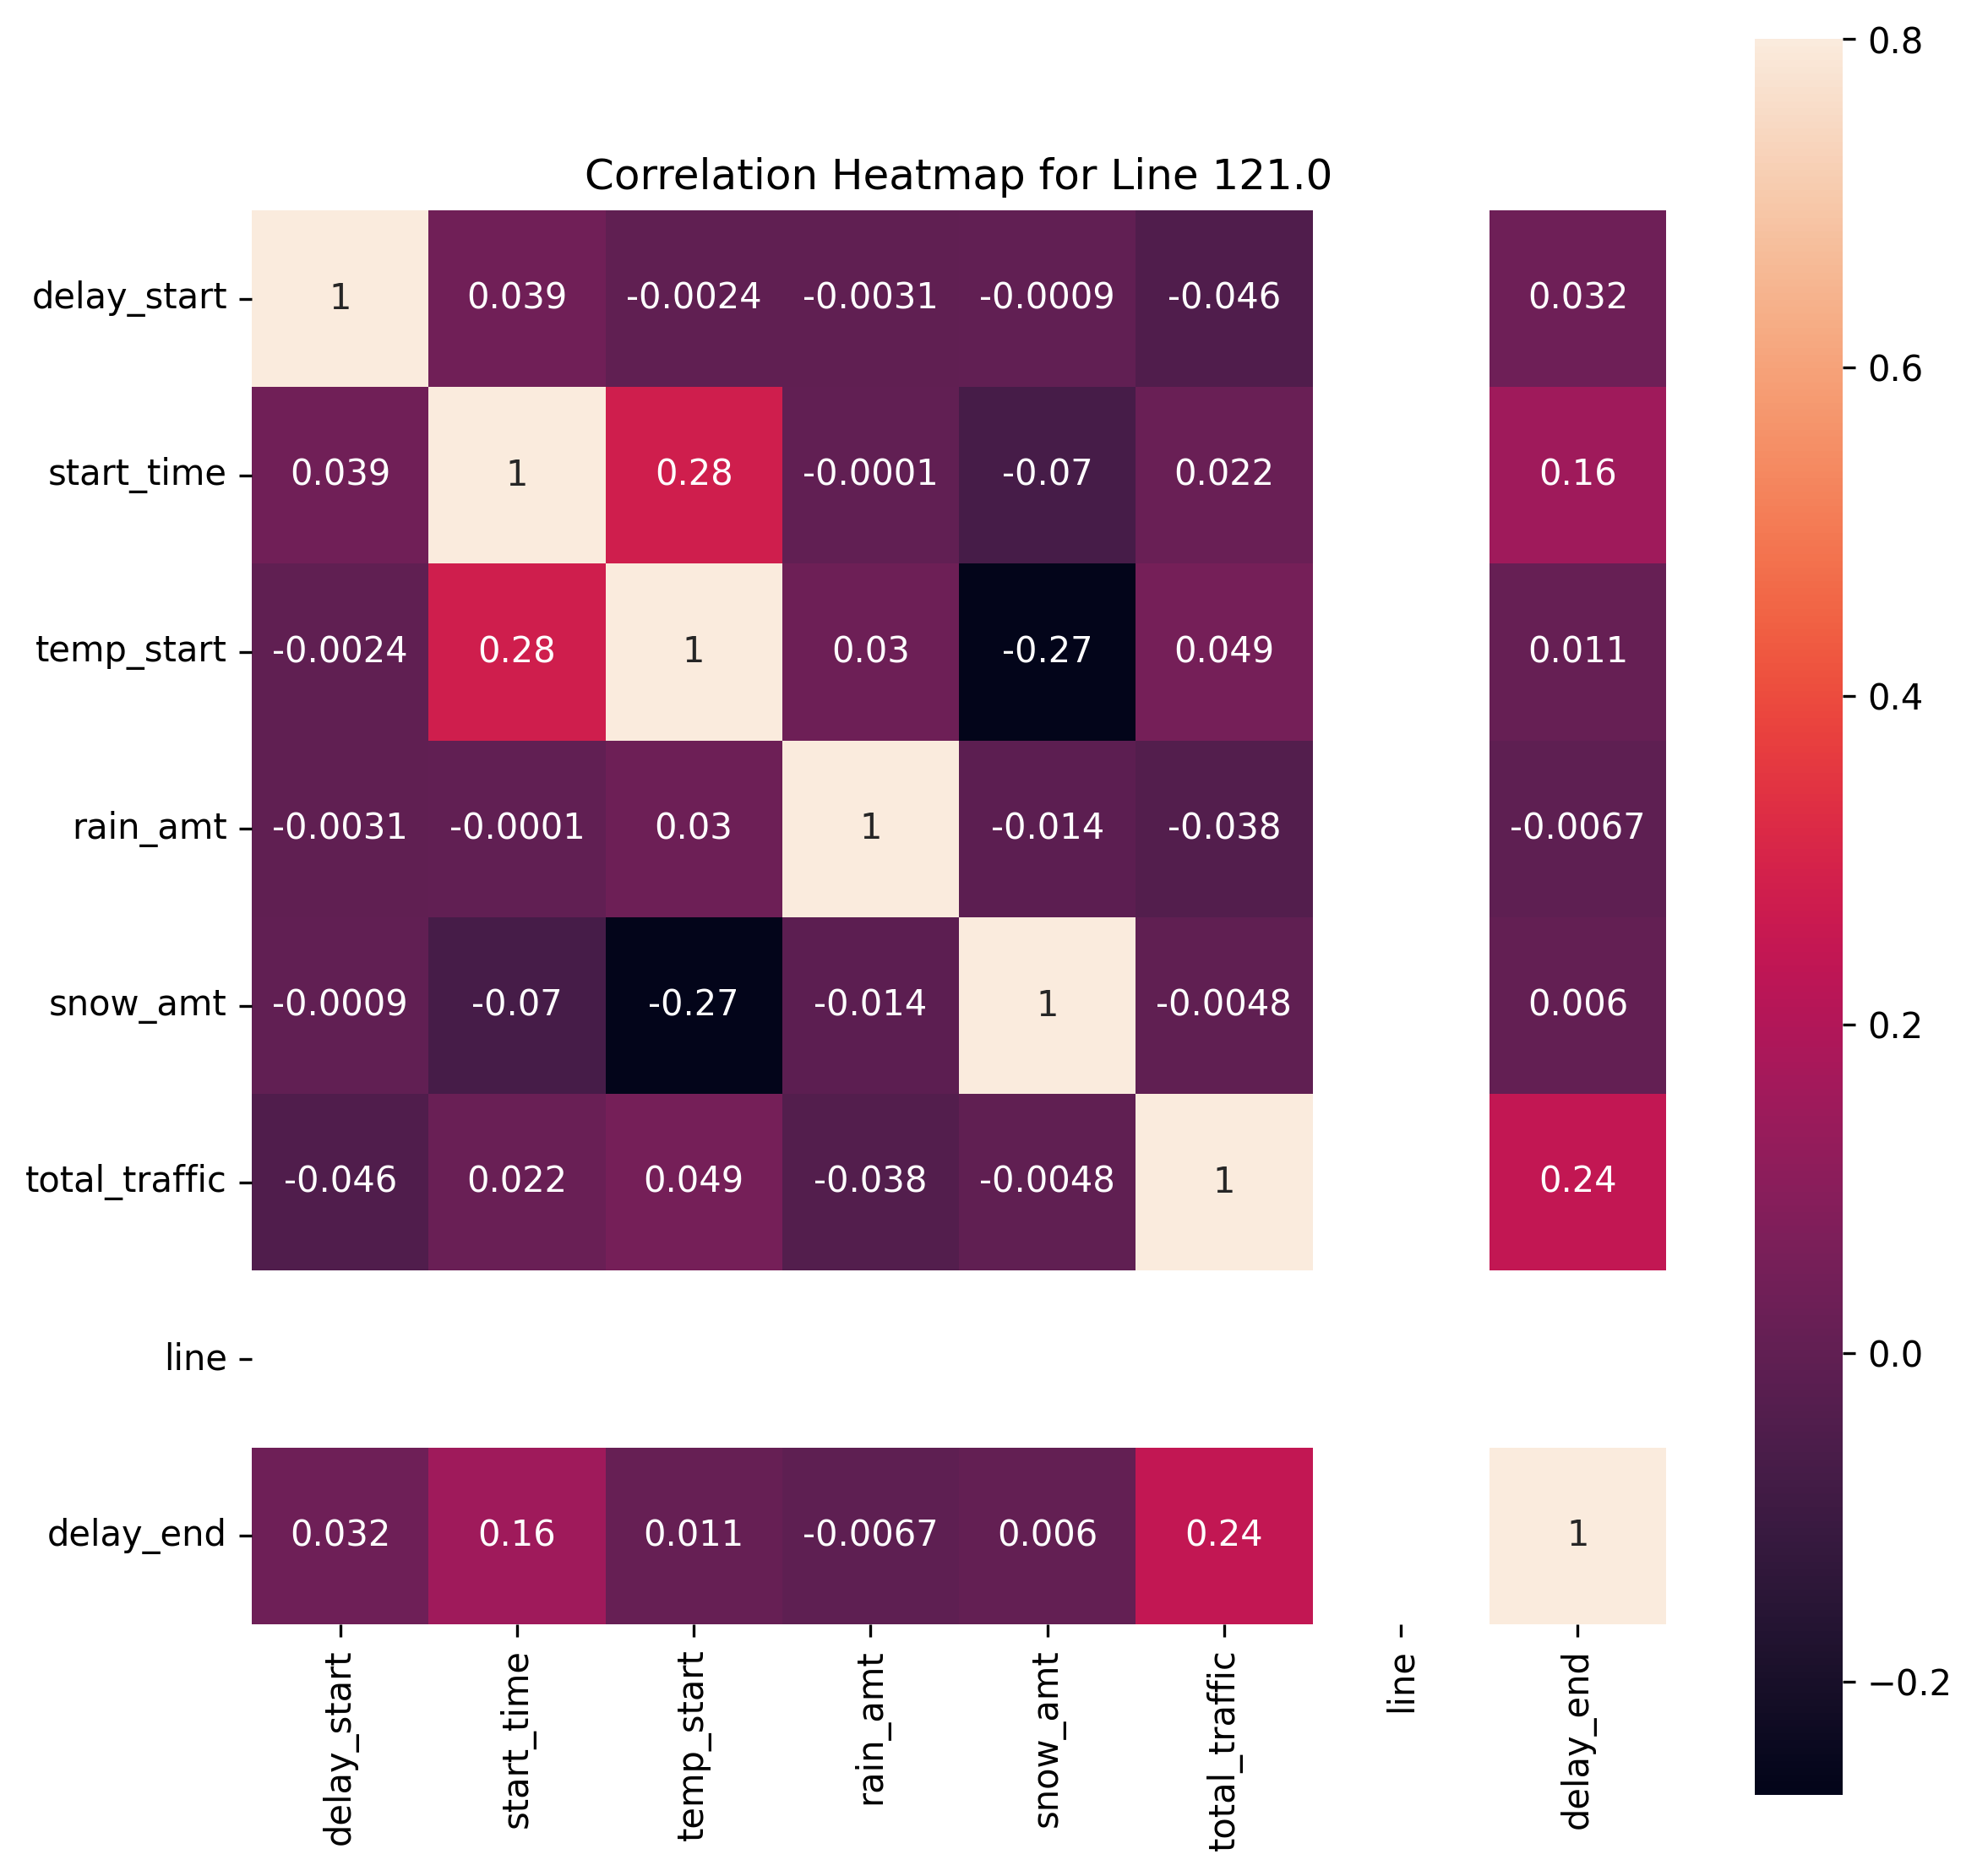

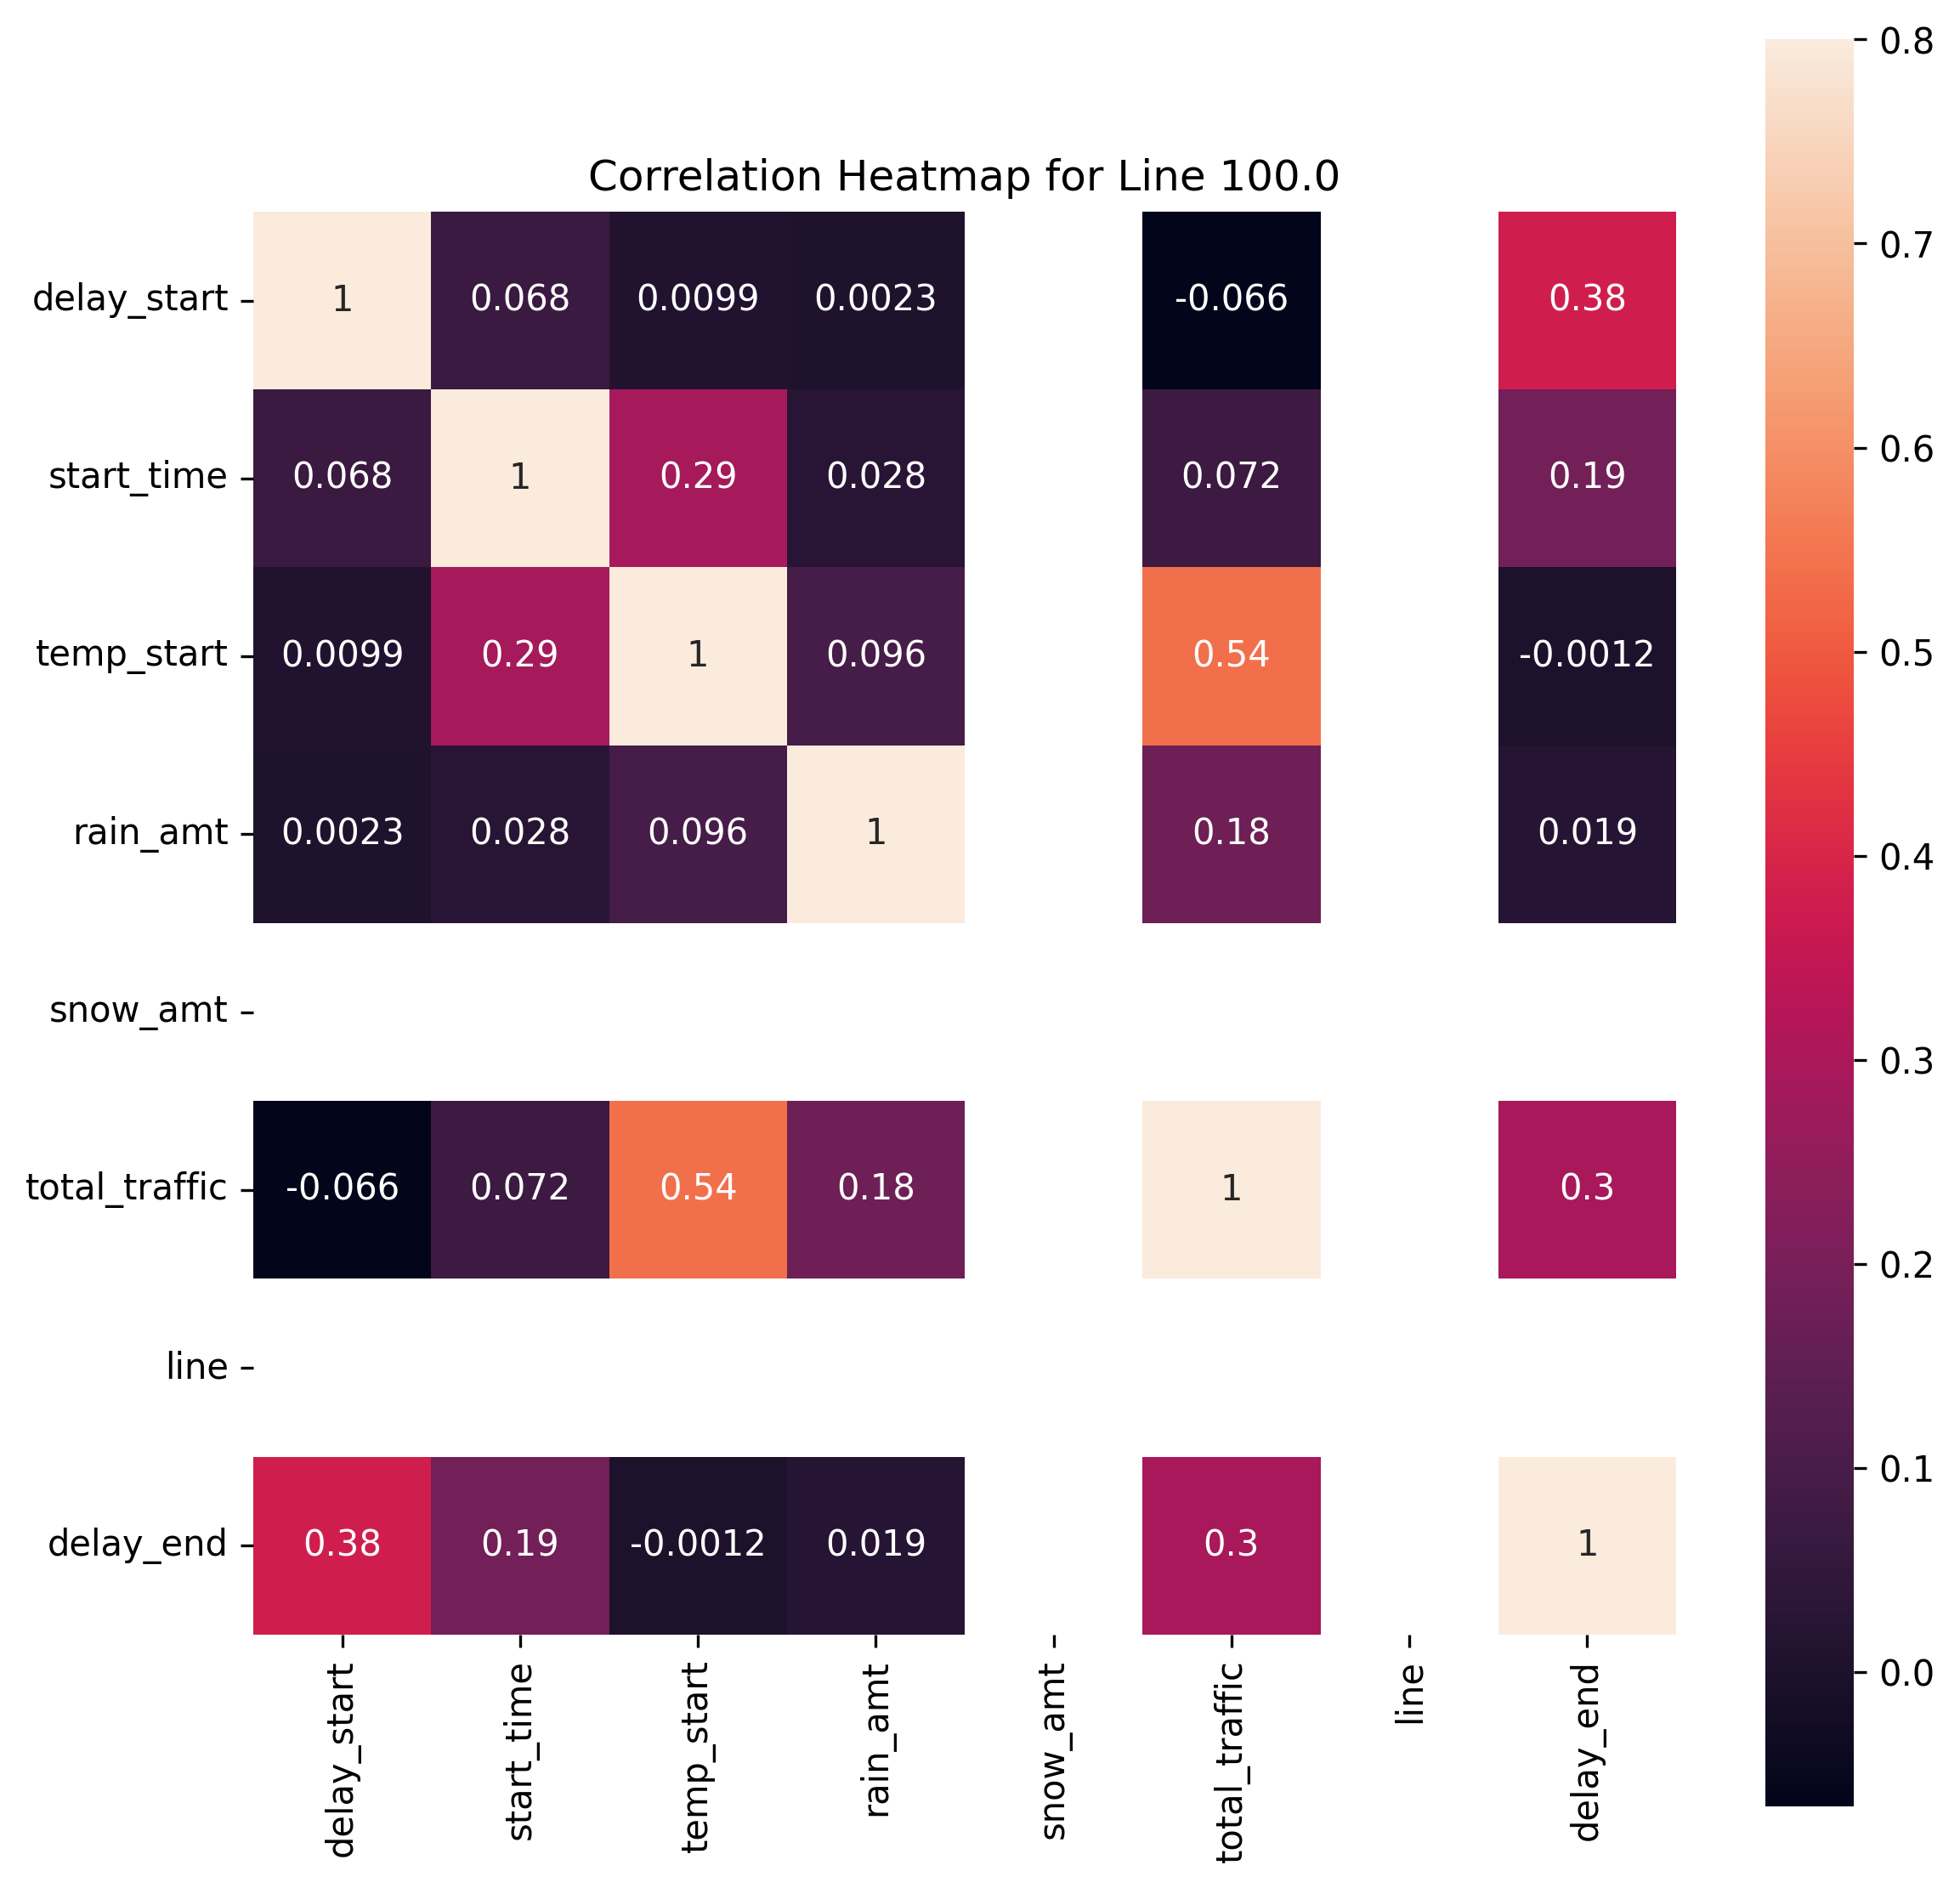

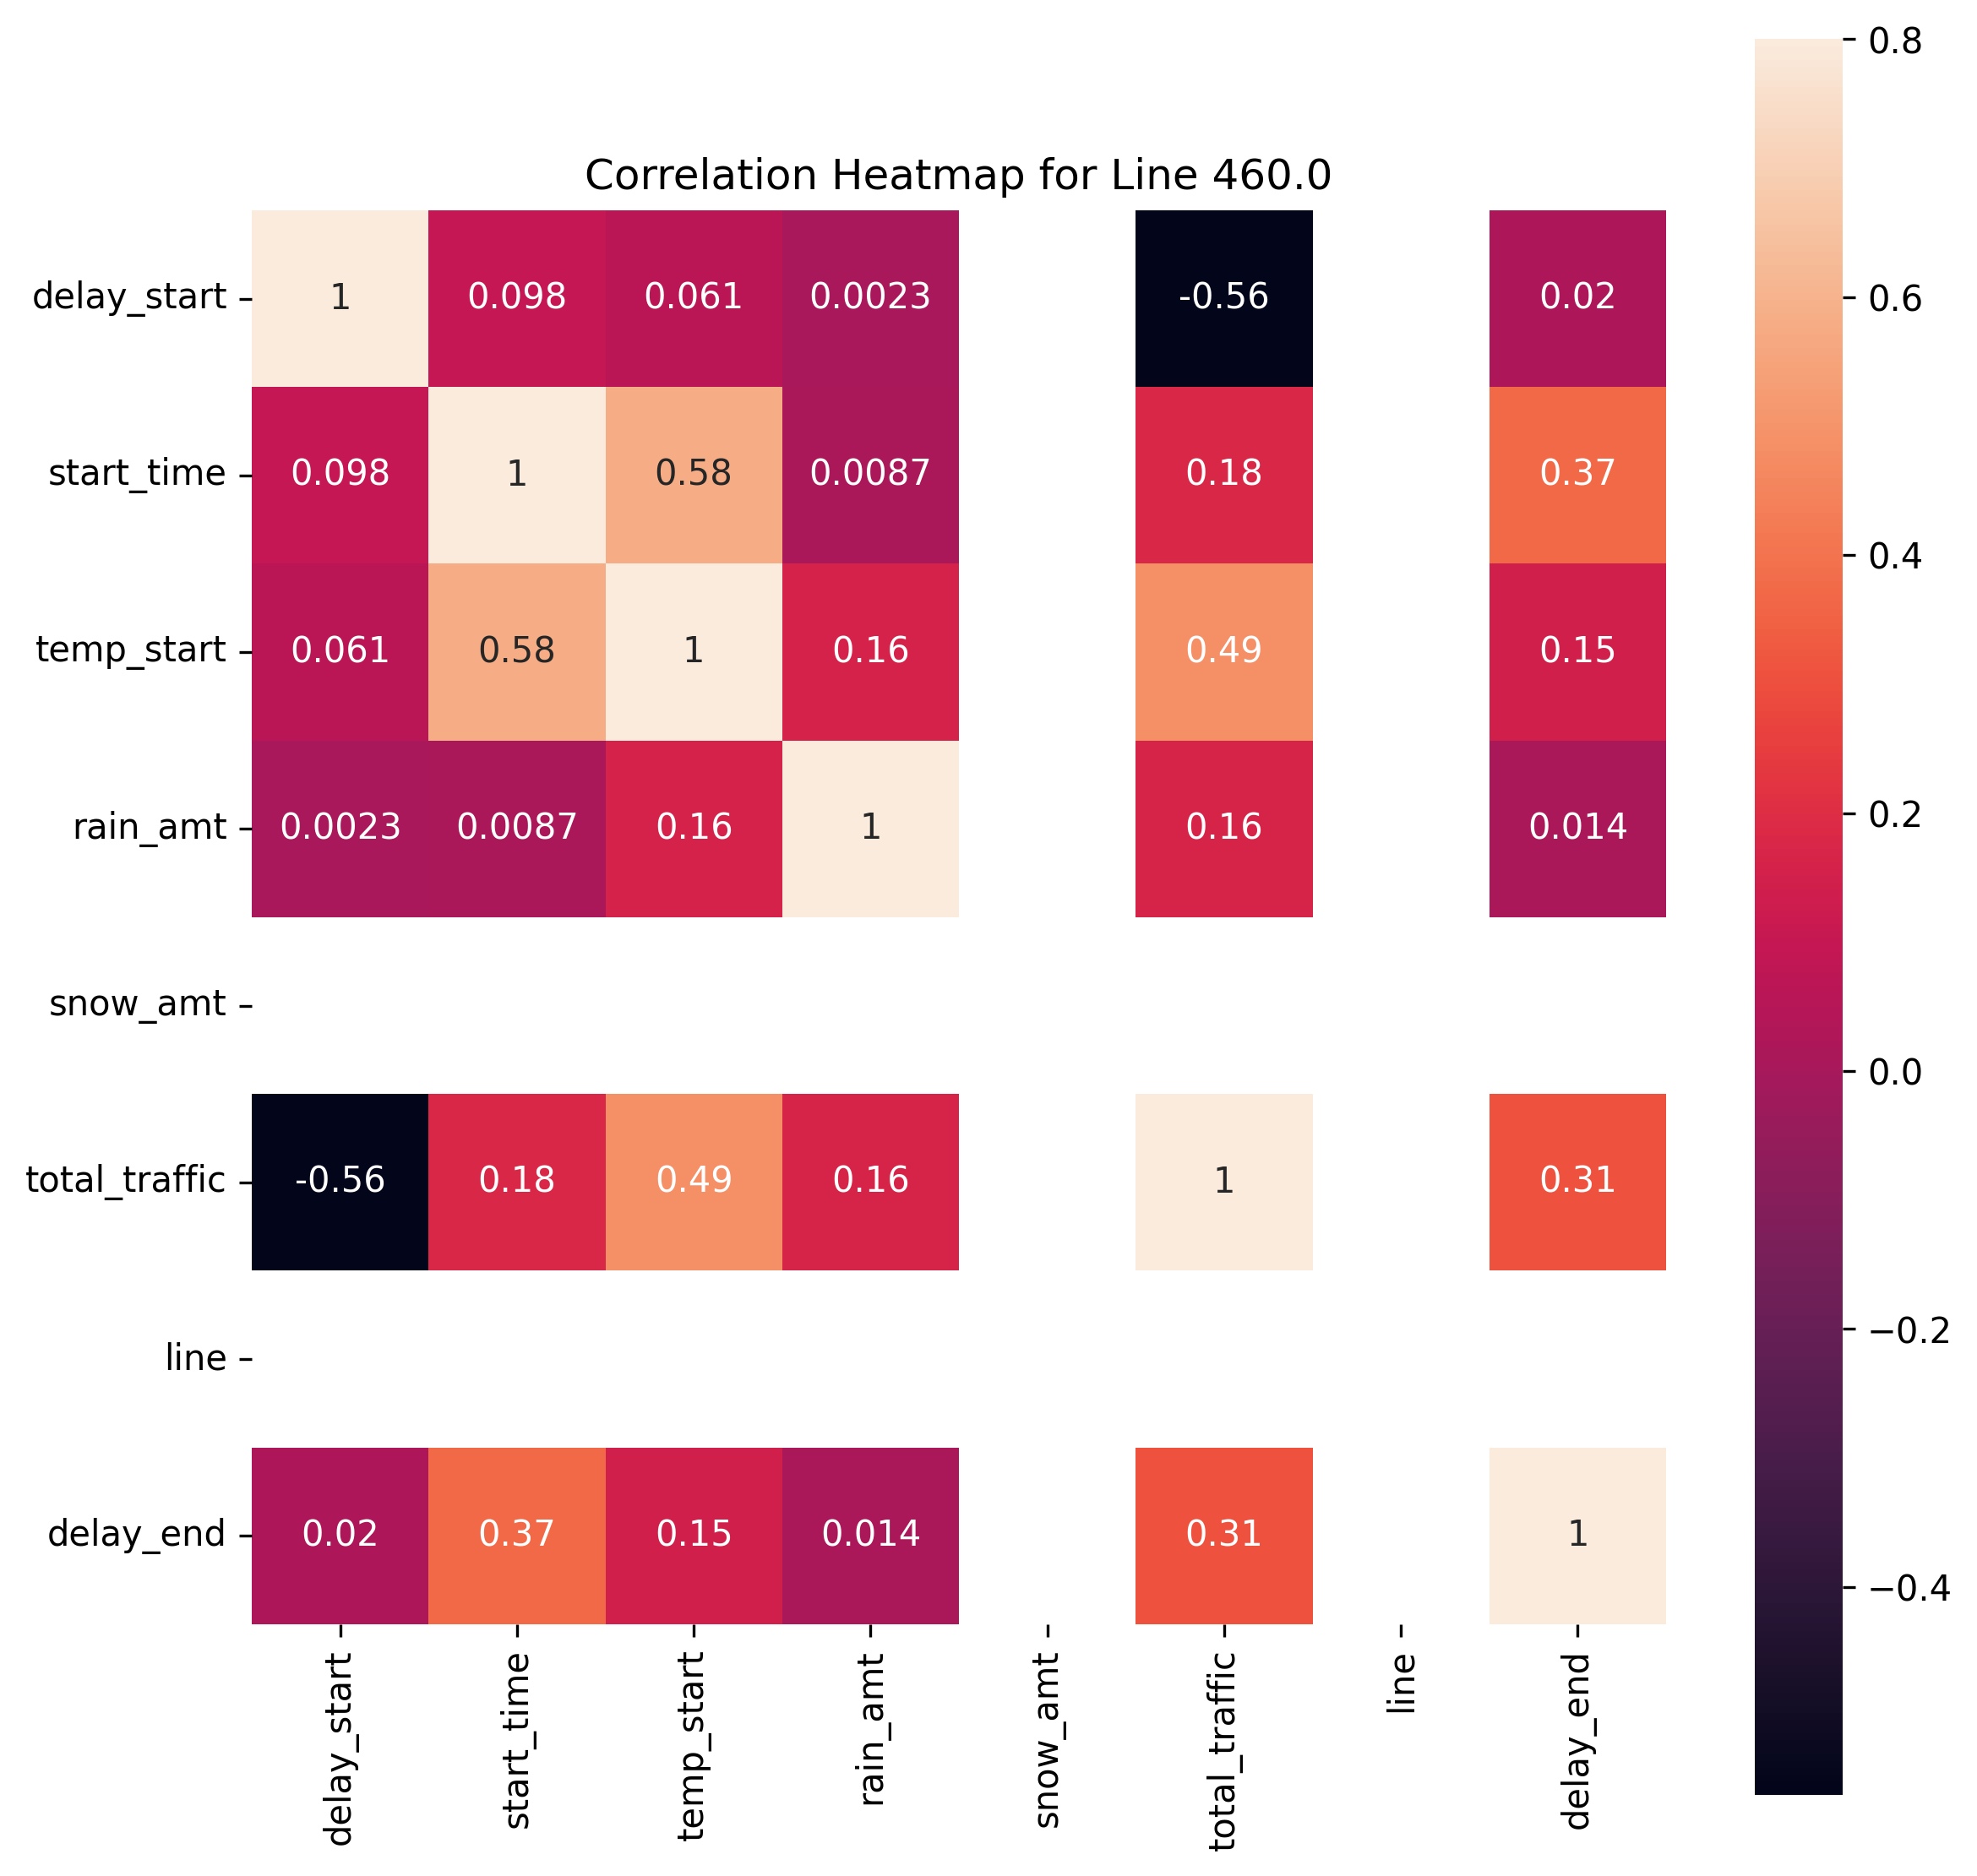

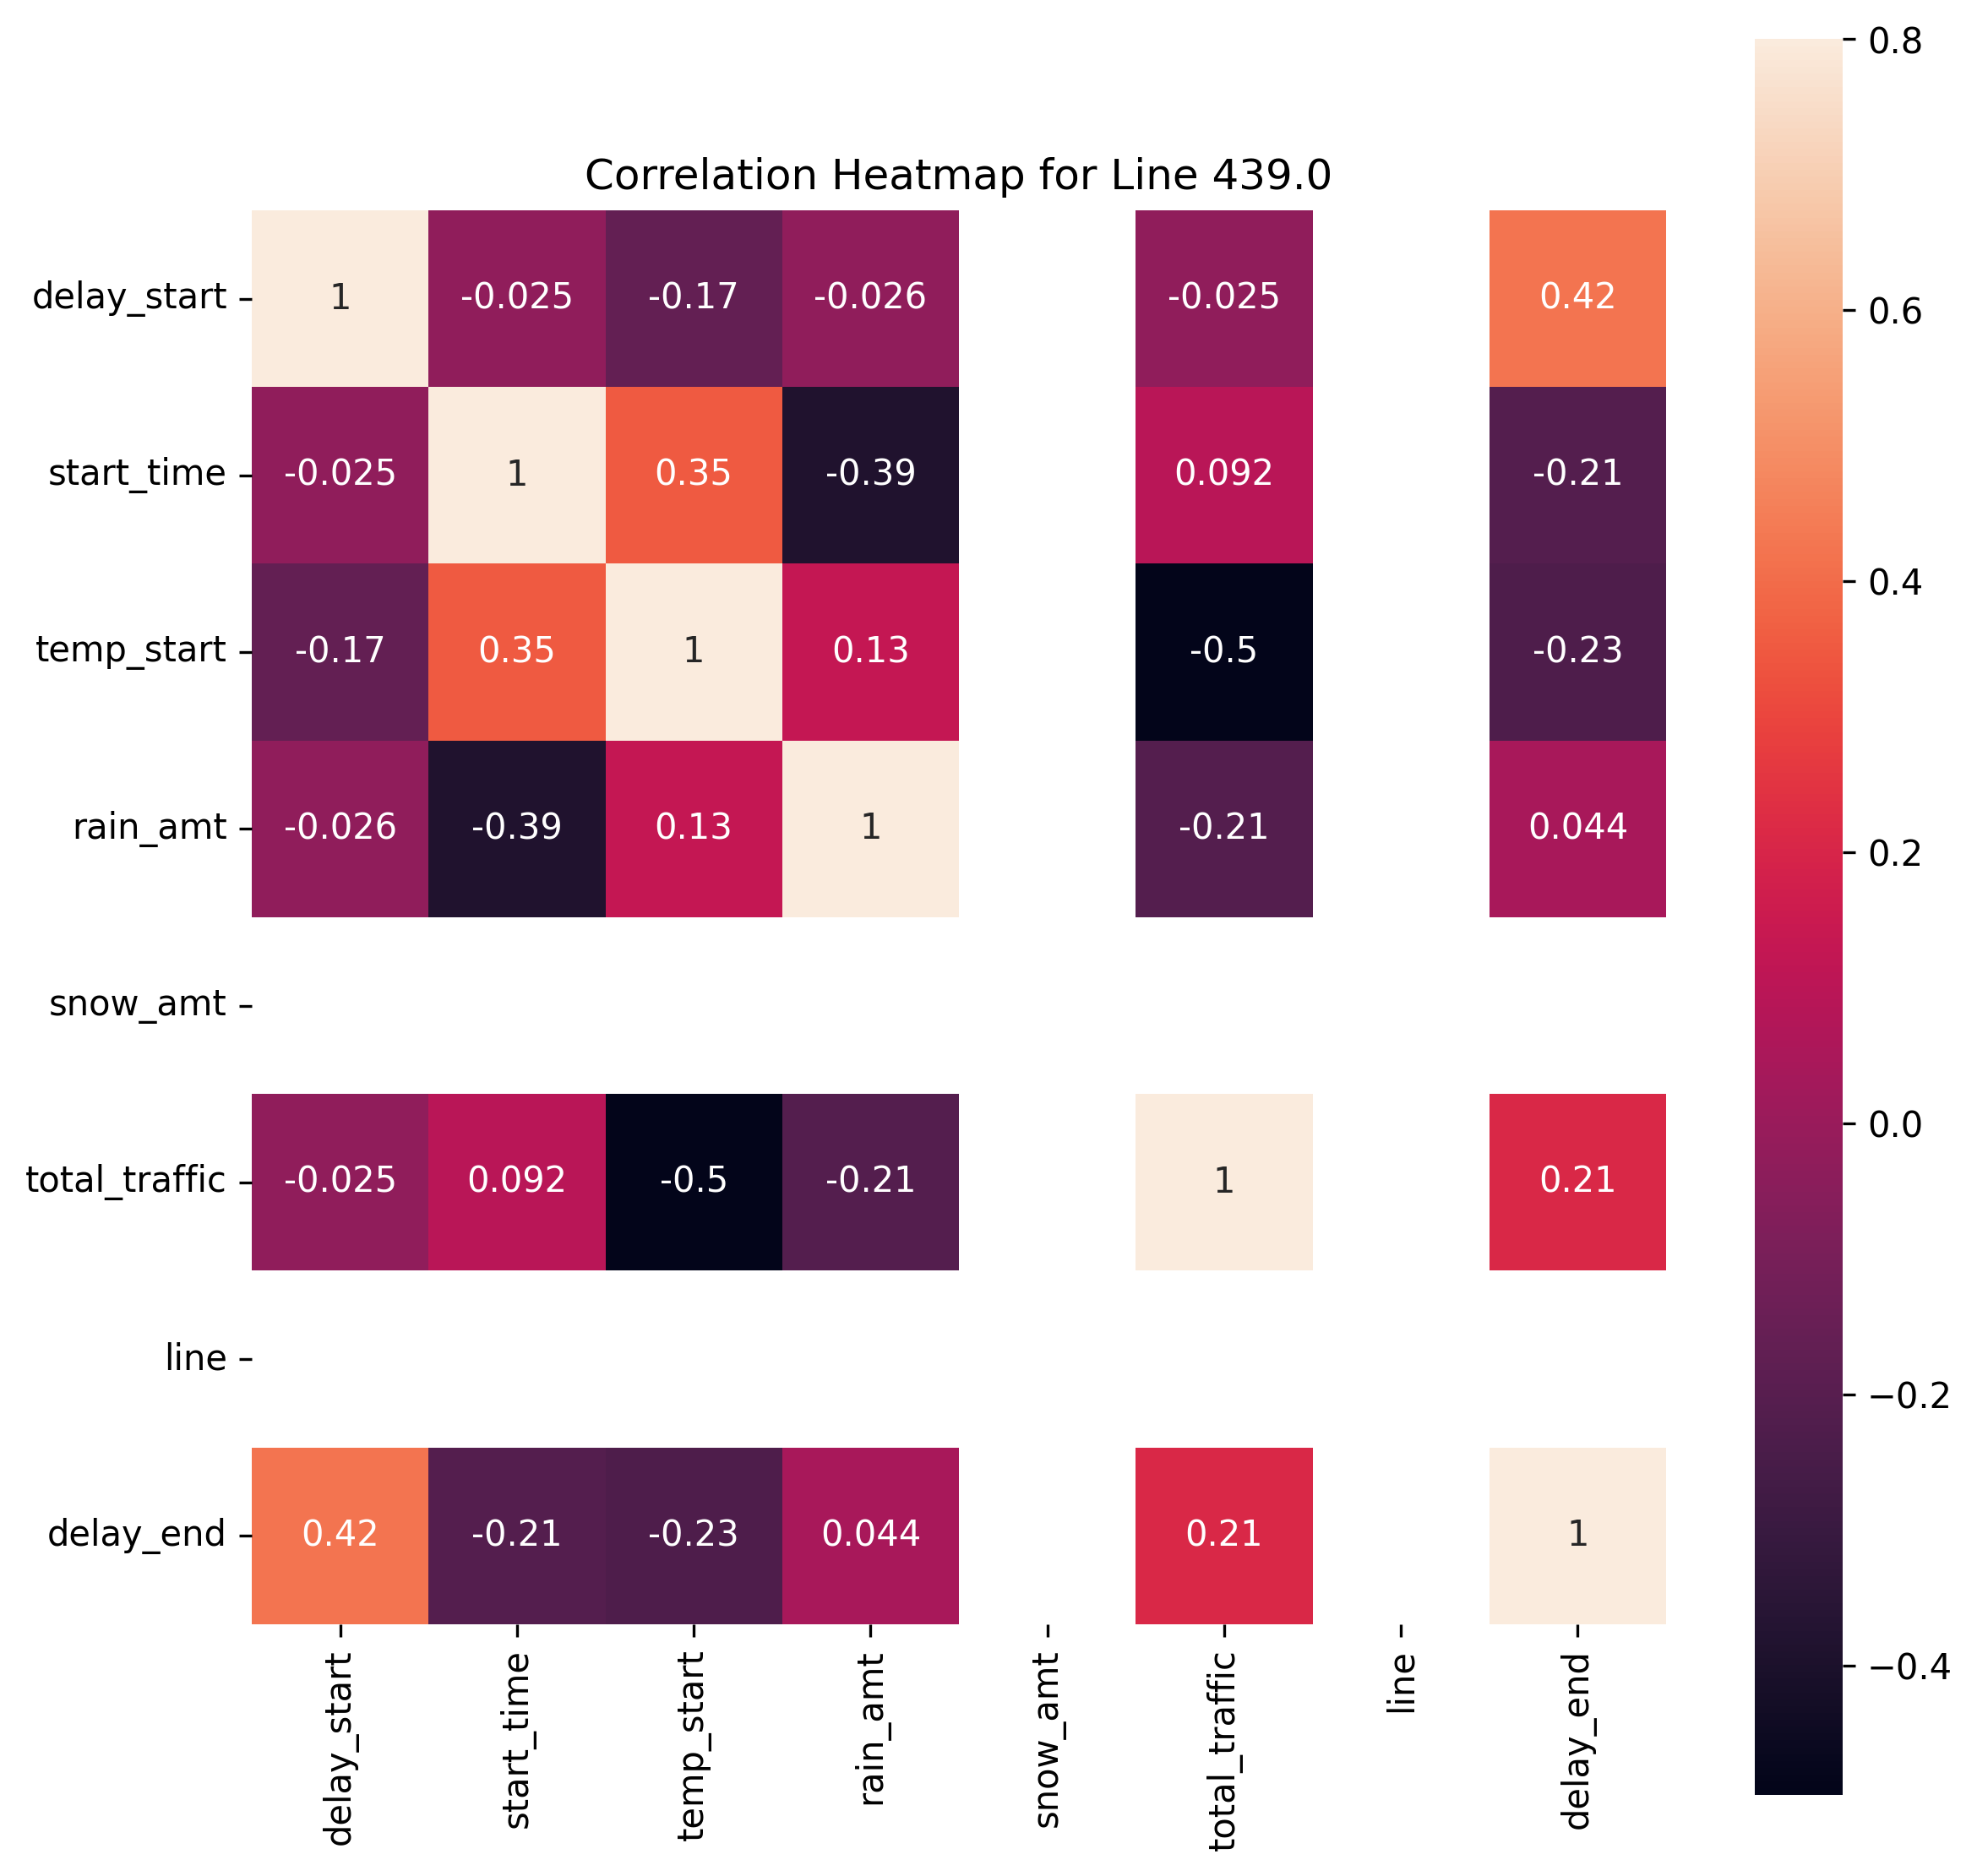

In [14]:
#make a correlation heatmap for each of the lines with more than 300 datapoints
for key in df_line_t.keys():
    Corr_mat = df_line_t[key].corr()

    # Increase the resolution of the image
    fig = plt.figure(figsize=(9, 9), dpi=300)

    sb.heatmap(Corr_mat, vmax=.8, square=True, annot=True)
    
    # Add the line number as the title
    plt.title(f'Correlation Heatmap for Line {key}')
    
    #plt.savefig(f'../Images/3_2_3_corr_mat_line_{key}.png', dpi=300)
    plt.show()

In [15]:
#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt', 'total_traffic']
outcome_lines = 'delay_end'

# Initialize a dictionary to store the data
data = {}

# Add the p-values to the data
for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key] = results.pvalues.round(3)

# Add the adjusted r-squared values to the data
for key in df_line_t.keys():
    if key not in data:
        data[key] = {}
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key]['Adjusted R-squared'] = round(results.rsquared_adj, 3)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Make the row titles bold
df.index = '**' + df.index + '**'

# Make the 'Adjusted R-squared' bold and italic
df = df.rename(index={'**Adjusted R-squared**': '**_Adjusted R-squared_**'})

# Print the DataFrame as a Markdown table
print(df.to_markdown())



|                          |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**          |   0.026 |  0.002 |   0.123 |   0     |   0     |   0     |
| **start_time**           |   0.261 |  0     |   0     |   0     |   0     |   0     |
| **temp_start**           |   0.005 |  0.014 |   0.091 |   0     |   0     |   0.359 |
| **rain_amt**             |   0.892 |  0.444 |   0.865 |   0.143 |   0.557 |   0.792 |
| **snow_amt**             |   0.555 |  0.232 |   0.786 |   0.01  |   0.002 |   0.688 |
| **total_traffic**        |   0.004 |  0     |   0     |   0     |   0     |   0     |
| **const**                |   0.382 |  0.255 |   0.001 |   0.01  |   0.001 |   0.098 |
| **_Adjusted R-squared_** |   0.04  |  0.029 |   0.081 |   0.335 |   0.318 |   0.266 |


In [16]:
#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'total_traffic']
outcome_lines = 'delay_end'

# Initialize a dictionary to store the data
data = {}

# Add the p-values to the data
for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key] = results.pvalues.round(3)

# Add the adjusted r-squared values to the data
for key in df_line_t.keys():
    if key not in data:
        data[key] = {}
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key]['Adjusted R-squared'] = round(results.rsquared_adj, 3)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Make the row titles bold
df.index = '**' + df.index + '**'

# Make the 'Adjusted R-squared' bold and italic
df = df.rename(index={'**Adjusted R-squared**': '**_Adjusted R-squared_**'})

# Print the DataFrame as a Markdown table
print(df.to_markdown())

|                          |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**          |   0.026 |  0.002 |   0.123 |   0     |   0     |   0     |
| **start_time**           |   0.261 |  0     |   0     |   0     |   0     |   0     |
| **temp_start**           |   0.005 |  0.014 |   0.068 |   0     |   0     |   0.359 |
| **rain_amt**             |   0.892 |  0.444 |   0.867 |   0.143 |   0.557 |   0.792 |
| **total_traffic**        |   0.004 |  0     |   0     |   0     |   0     |   0     |
| **const**                |   0.382 |  0.255 |   0.001 |   0.01  |   0.001 |   0.098 |
| **_Adjusted R-squared_** |   0.04  |  0.029 |   0.082 |   0.335 |   0.318 |   0.266 |


In [17]:
#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'total_traffic']
outcome_lines = 'delay_end'

# Initialize a dictionary to store the data
data = {}

# Add the p-values to the data
for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key] = results.pvalues.round(3)

# Add the adjusted r-squared values to the data
for key in df_line_t.keys():
    if key not in data:
        data[key] = {}
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key]['Adjusted R-squared'] = round(results.rsquared_adj, 3)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Make the row titles bold
df.index = '**' + df.index + '**'

# Make the 'Adjusted R-squared' bold and italic
df = df.rename(index={'**Adjusted R-squared**': '**_Adjusted R-squared_**'})

# Print the DataFrame as a Markdown table
print(df.to_markdown())

|                          |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**          |   0.025 |  0.002 |   0.123 |   0     |   0     |   0     |
| **start_time**           |   0.261 |  0     |   0     |   0     |   0     |   0     |
| **temp_start**           |   0.005 |  0.008 |   0.069 |   0     |   0     |   0.31  |
| **total_traffic**        |   0.003 |  0     |   0     |   0     |   0     |   0     |
| **const**                |   0.386 |  0.202 |   0.001 |   0.009 |   0.001 |   0.099 |
| **_Adjusted R-squared_** |   0.042 |  0.029 |   0.082 |   0.334 |   0.319 |   0.268 |


In [18]:
# transform the data with log to make it linear
# since there may be 0 values, add a small constant to total_traffic

original_setting = pd.options.mode.chained_assignment
pd.options.mode.chained_assignment = None  # default='warn'

for key in df_line_t.keys():
    df_line_t[key].loc[:, 'total_traffic_log'] = np.log(df_line_t[key]['total_traffic'] + 1e-10)

pd.options.mode.chained_assignment = original_setting


#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'total_traffic_log']
outcome_lines = 'delay_end'

# Initialize a dictionary to store the data
data = {}

# Add the p-values to the data
for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key] = results.pvalues.round(3)

# Add the adjusted r-squared values to the data
for key in df_line_t.keys():
    if key not in data:
        data[key] = {}
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key]['Adjusted R-squared'] = round(results.rsquared_adj, 3)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Make the row titles bold
df.index = '**' + df.index + '**'

# Make the 'Adjusted R-squared' bold and italic
df = df.rename(index={'**Adjusted R-squared**': '**_Adjusted R-squared_**'})

# Print the DataFrame as a Markdown table
print(df.to_markdown())

|                          |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**          |   0.027 |  0.005 |   0.071 |   0     |   0.002 |   0     |
| **start_time**           |   0.287 |  0     |   0     |   0     |   0     |   0     |
| **temp_start**           |   0.009 |  0.03  |   0.439 |   0     |   0     |   0.844 |
| **total_traffic_log**    |   0.008 |  0.002 |   0     |   0     |   0     |   0     |
| **const**                |   0.076 |  0.072 |   0     |   0     |   0     |   0.365 |
| **_Adjusted R-squared_** |   0.038 |  0.022 |   0.093 |   0.289 |   0.355 |   0.249 |


In [19]:

original_setting = pd.options.mode.chained_assignment
pd.options.mode.chained_assignment = None 

for key in df_line_t.keys():
    df_line_t[key].loc[:, 'total_traffic_sqrt'] = np.sqrt(df_line_t[key]['total_traffic'])

pd.options.mode.chained_assignment = original_setting

# Create dictionaries to store the r-squared values and coefficients
rsquared_t = {key: {} for key in df_line_t.keys()}
coefficients = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'total_traffic_sqrt']
outcome_lines = 'delay_end'

# Initialize a dictionary to store the data
data = {}

# Add the p-values and coefficients to the data
for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key] = results.pvalues.round(3)
    coefficients[key] = results.params.round(3)

# Add the adjusted r-squared values to the data
for key in df_line_t.keys():
    if key not in data:
        data[key] = {}
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    data[key]['Adjusted R-squared'] = round(results.rsquared_adj, 3)

# Convert the data to a DataFrame
df_pvalues = pd.DataFrame(data)
df_coefficients = pd.DataFrame(coefficients)

# Make the row titles bold
df_pvalues.index = '**' + df_pvalues.index + '**'
df_coefficients.index = '**' + df_coefficients.index + '**'

# Make the 'Adjusted R-squared' bold and italic
df_pvalues = df_pvalues.rename(index={'**Adjusted R-squared**': '**_Adjusted R-squared_**'})

# Print the DataFrames as Markdown tables
print(df_pvalues.to_markdown())
print(df_coefficients.to_markdown())

|                          |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**          |   0.026 |  0.003 |   0.08  |   0     |   0     |   0     |
| **start_time**           |   0.276 |  0     |   0     |   0     |   0     |   0     |
| **temp_start**           |   0.006 |  0.015 |   0.157 |   0     |   0     |   0.469 |
| **total_traffic_sqrt**   |   0.006 |  0     |   0     |   0     |   0     |   0     |
| **const**                |   0.963 |  0.81  |   0     |   0.022 |   0.077 |   0.288 |
| **_Adjusted R-squared_** |   0.04  |  0.025 |   0.094 |   0.32  |   0.34  |   0.26  |
|                        |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:-----------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| **delay_start**        |   0.108 |  0.088 |   0.018 |   0.651 |   0.082 |   0.478 |
| **start_time**         |  -0.001 | -

In [20]:
#get the average value for each predictor for each line
# Create a dictionary to store the average values
average_values = {key: {} for key in df_line_t.keys()}
predictors_lines = ['delay_start', 'start_time', 'temp_start', 'total_traffic_sqrt']
outcome_lines = 'delay_end'

# Add the average values to the dictionary
for key in df_line_t.keys():
    for predictor in predictors_lines:
        average_values[key][predictor] = df_line_t[key][predictor].mean()

# Convert the dictionary to a DataFrame
df = pd.DataFrame(average_values)

# Make the row titles bold
df.index = '**' + df.index + '**'

# Print the DataFrame as a Markdown table
print(df.to_markdown())

|                        |        467.0 |        67.0 |      121.0 |     100.0 |      460.0 |      439.0 |
|:-----------------------|-------------:|------------:|-----------:|----------:|-----------:|-----------:|
| **delay_start**        |  -0.00506329 |   0.0821018 |  -0.307161 |   1.20152 |  -0.004158 |   0.737013 |
| **start_time**         | 731.284      | 747.198     | 754.282    | 760.364   | 651.786    | 710.932    |
| **temp_start**         |  10.5575     |  10.2019    |  17.5991   |  18.9654  |  18.3611   |  16.2468   |
| **total_traffic_sqrt** |  50.8824     |  55.1666    |  44.4404   |  33.8653  |  48.4406   |  50.851    |


In [23]:
#make a prediction for lines 100, 460, and 439

delay = 2
time = 600
temp = 15
traffic_sqrt = 50

X = [delay, time, temp, traffic_sqrt,1]

# Create a dictionary to store the predictions
predictions = {}

# Add the predictions to the dictionary
for key in df_line_t.keys():
    predictions[key] = np.dot(X, df_coefficients[key])

# Convert the dictionary to a DataFrame
df = pd.DataFrame(predictions, index=['Delay at End of Trip (min)'])

print(df.to_markdown())
   

|                            |   467.0 |   67.0 |   121.0 |   100.0 |   460.0 |   439.0 |
|:---------------------------|--------:|-------:|--------:|--------:|--------:|--------:|
| Delay at End of Trip (min) |   3.008 |  1.401 |   1.296 |   9.264 |   8.405 |   6.811 |


In [31]:
#get the mse for each line

# Create a dictionary to store the MSE and ME values
mse = {key: {} for key in df_line_t.keys()}
me = {key: {} for key in df_line_t.keys()}

# Add the MSE and ME values to the dictionaries
for key in df_line_t.keys():
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    mse[key] = results.mse_resid
    me[key] = mse[key]**0.5

#obtain the average value of mse and me
mse_avg = np.mean(list(mse.values()))
me_avg = np.mean(list(me.values()))

print('The average MSE is', mse_avg)
print('The average ME is', me_avg)


#convert the data to a dataframe
df_mse = pd.DataFrame(mse, index=['MSE'])
df_me = pd.DataFrame(me, index=['ME'])

#transpose the dataframes
df_mse = df_mse.transpose()
df_me = df_me.transpose()

#print the dataframes as markdown tables
print(df_mse.to_markdown())
print(df_me.to_markdown())

    


The average MSE is 35.36641792427831
The average ME is 5.8469012807217835
|     |     MSE |
|----:|--------:|
| 467 | 22.3232 |
|  67 | 25.8241 |
| 121 | 32.4275 |
| 100 | 44.2421 |
| 460 | 61.519  |
| 439 | 25.8626 |
|     |      ME |
|----:|--------:|
| 467 | 4.72474 |
|  67 | 5.08175 |
| 121 | 5.69451 |
| 100 | 6.65147 |
| 460 | 7.84341 |
| 439 | 5.08553 |


<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./6_2_1_MLR_bus_weather.ipynb">← Previous: Appendix B.1: MLR With Weather</a>
<span style="flex: 1; text-align: center;">Appendix B.2: MLR With Traffic</span>
<span style="flex: 1; text-align: right;"></span>
</div>
